In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
day_data=pd.read_csv("/content/drive/MyDrive/day_wise_data_ss.csv")
month_data=pd.read_csv("/content/drive/MyDrive/month_wise_data_ss.csv")
show_data=pd.read_csv("/content/drive/MyDrive/show_lvl_data_ss.csv")

In [3]:
num_customer_ids = day_data['ID'].nunique()
print("Number of unique customer IDs in day_data:", num_customer_ids)

Number of unique customer IDs in day_data: 23819


In [4]:
num_customer_ids = month_data['ID'].nunique()
print("Number of unique customer IDs in month_data:", num_customer_ids)

Number of unique customer IDs in month_data: 23819


In [5]:
num_customer_ids = show_data['ID'].nunique()
print("Number of unique customer IDs in show_data:", num_customer_ids)

Number of unique customer IDs in show_data: 23819


to remove duplicate show titles from your DataFrame

# unique show titles

```
Total number of unique show titles: 3276
```



In [6]:
show_data = show_data.drop_duplicates(subset=['show_title'])
show_data

,watched_date,show_title,GENRE,episode_title,STREAMING_MINS,device_type,Membership_Status,FIRST_Paid_CHANNEL,Subscription_Level,Giving_Type,...,City,HOUSEHOLD_INCOME,TOUCHPOINTS,PP_Activated,Age,IS_ON_AirStation,IS_ON_WBTA_Station,Acquired_Source,User_Registered_Date_only,ID
0,2021-07-13 13:36:25.243467+00:00,Chicago Tonight,NaN,New Burns and Novick Documentary Explores Life...,0.520000,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265
1,2021-07-14 09:40:15.848089+00:00,Hemingway,History,Hemingway and Childhood,1.370000,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265
2,2021-07-15 12:10:37.989777+00:00,Greater Boston,NaN,"July 6, 2021",11.330000,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265
3,2021-08-18 16:26:05.123773+00:00,Liza with a Z,Arts and Music,Liza With a Z,0.000000,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265
4,2021-08-21 20:32:20.856815+00:00,The Congress,NaN,The Congress,71.230000,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681955,2023-05-18 03:19:18.909000+00:00,An Ozark Mountain Symphony: A Musical Celebration,Arts and Music,An Ozark Mountain Symphony: A Musical Celebration,2.000000,Roku,Lapsed,On-Air,above_avg,Renewal,...,Bellingham,104000.0,4,N,Over 75,No,Yes,9Org,2021-07-19T18:47:17Z,5007964
1693833,2023-02-10 21:18:19.904000+00:00,Stories I Didn't Know,Culture,Stories I Didn't Know,2.316667,Roku,Lapsed,Web,low,New,...,Port Alberni,NaN,4,Y,NaN,No,Yes,9Org,2023-01-09T20:02:41Z,5706170
1695710,2023-01-25 18:33:16.953000+00:00,For Your Home,Home and How To,Outdoor Living,0.383333,Roku,Lapsed,Web,low,Rejoin,...,Elk Grove,134000.0,5,N,26 to 39,No,Yes,9Org,2021-09-28T18:15:23Z,5184090
1702357,2023-06-19 04:59:41.991000+00:00,Sweet Dillard,Arts and Music,Sweet Dillard,51.383333,TVOS,Lapsed,Web,low,New,...,Coldstream,NaN,4,Y,NaN,No,Yes,9Org,2022-02-23T02:51:41Z,5805198


In [7]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2.Calculate the percentage of days users are active in a month.

In [8]:
day_data['Watched_date_only'] = pd.to_datetime(day_data['Watched_date_only'])

In [9]:
day_data['Year_Month'] = day_data['Watched_date_only'].dt.to_period('M')
user_monthly_data = day_data.groupby(['ID', 'Year_Month']).size().reset_index(name='Active_Days')
user_monthly_data

,ID,Year_Month,Active_Days
0,5000075,2022-06,9
1,5000075,2022-07,4
2,5000121,2020-11,7
3,5000121,2020-12,9
4,5000121,2021-02,1
...,...,...,...
182115,5999967,2021-06,4
182116,5999967,2021-09,1
182117,5999967,2022-05,1
182118,5999967,2022-08,4


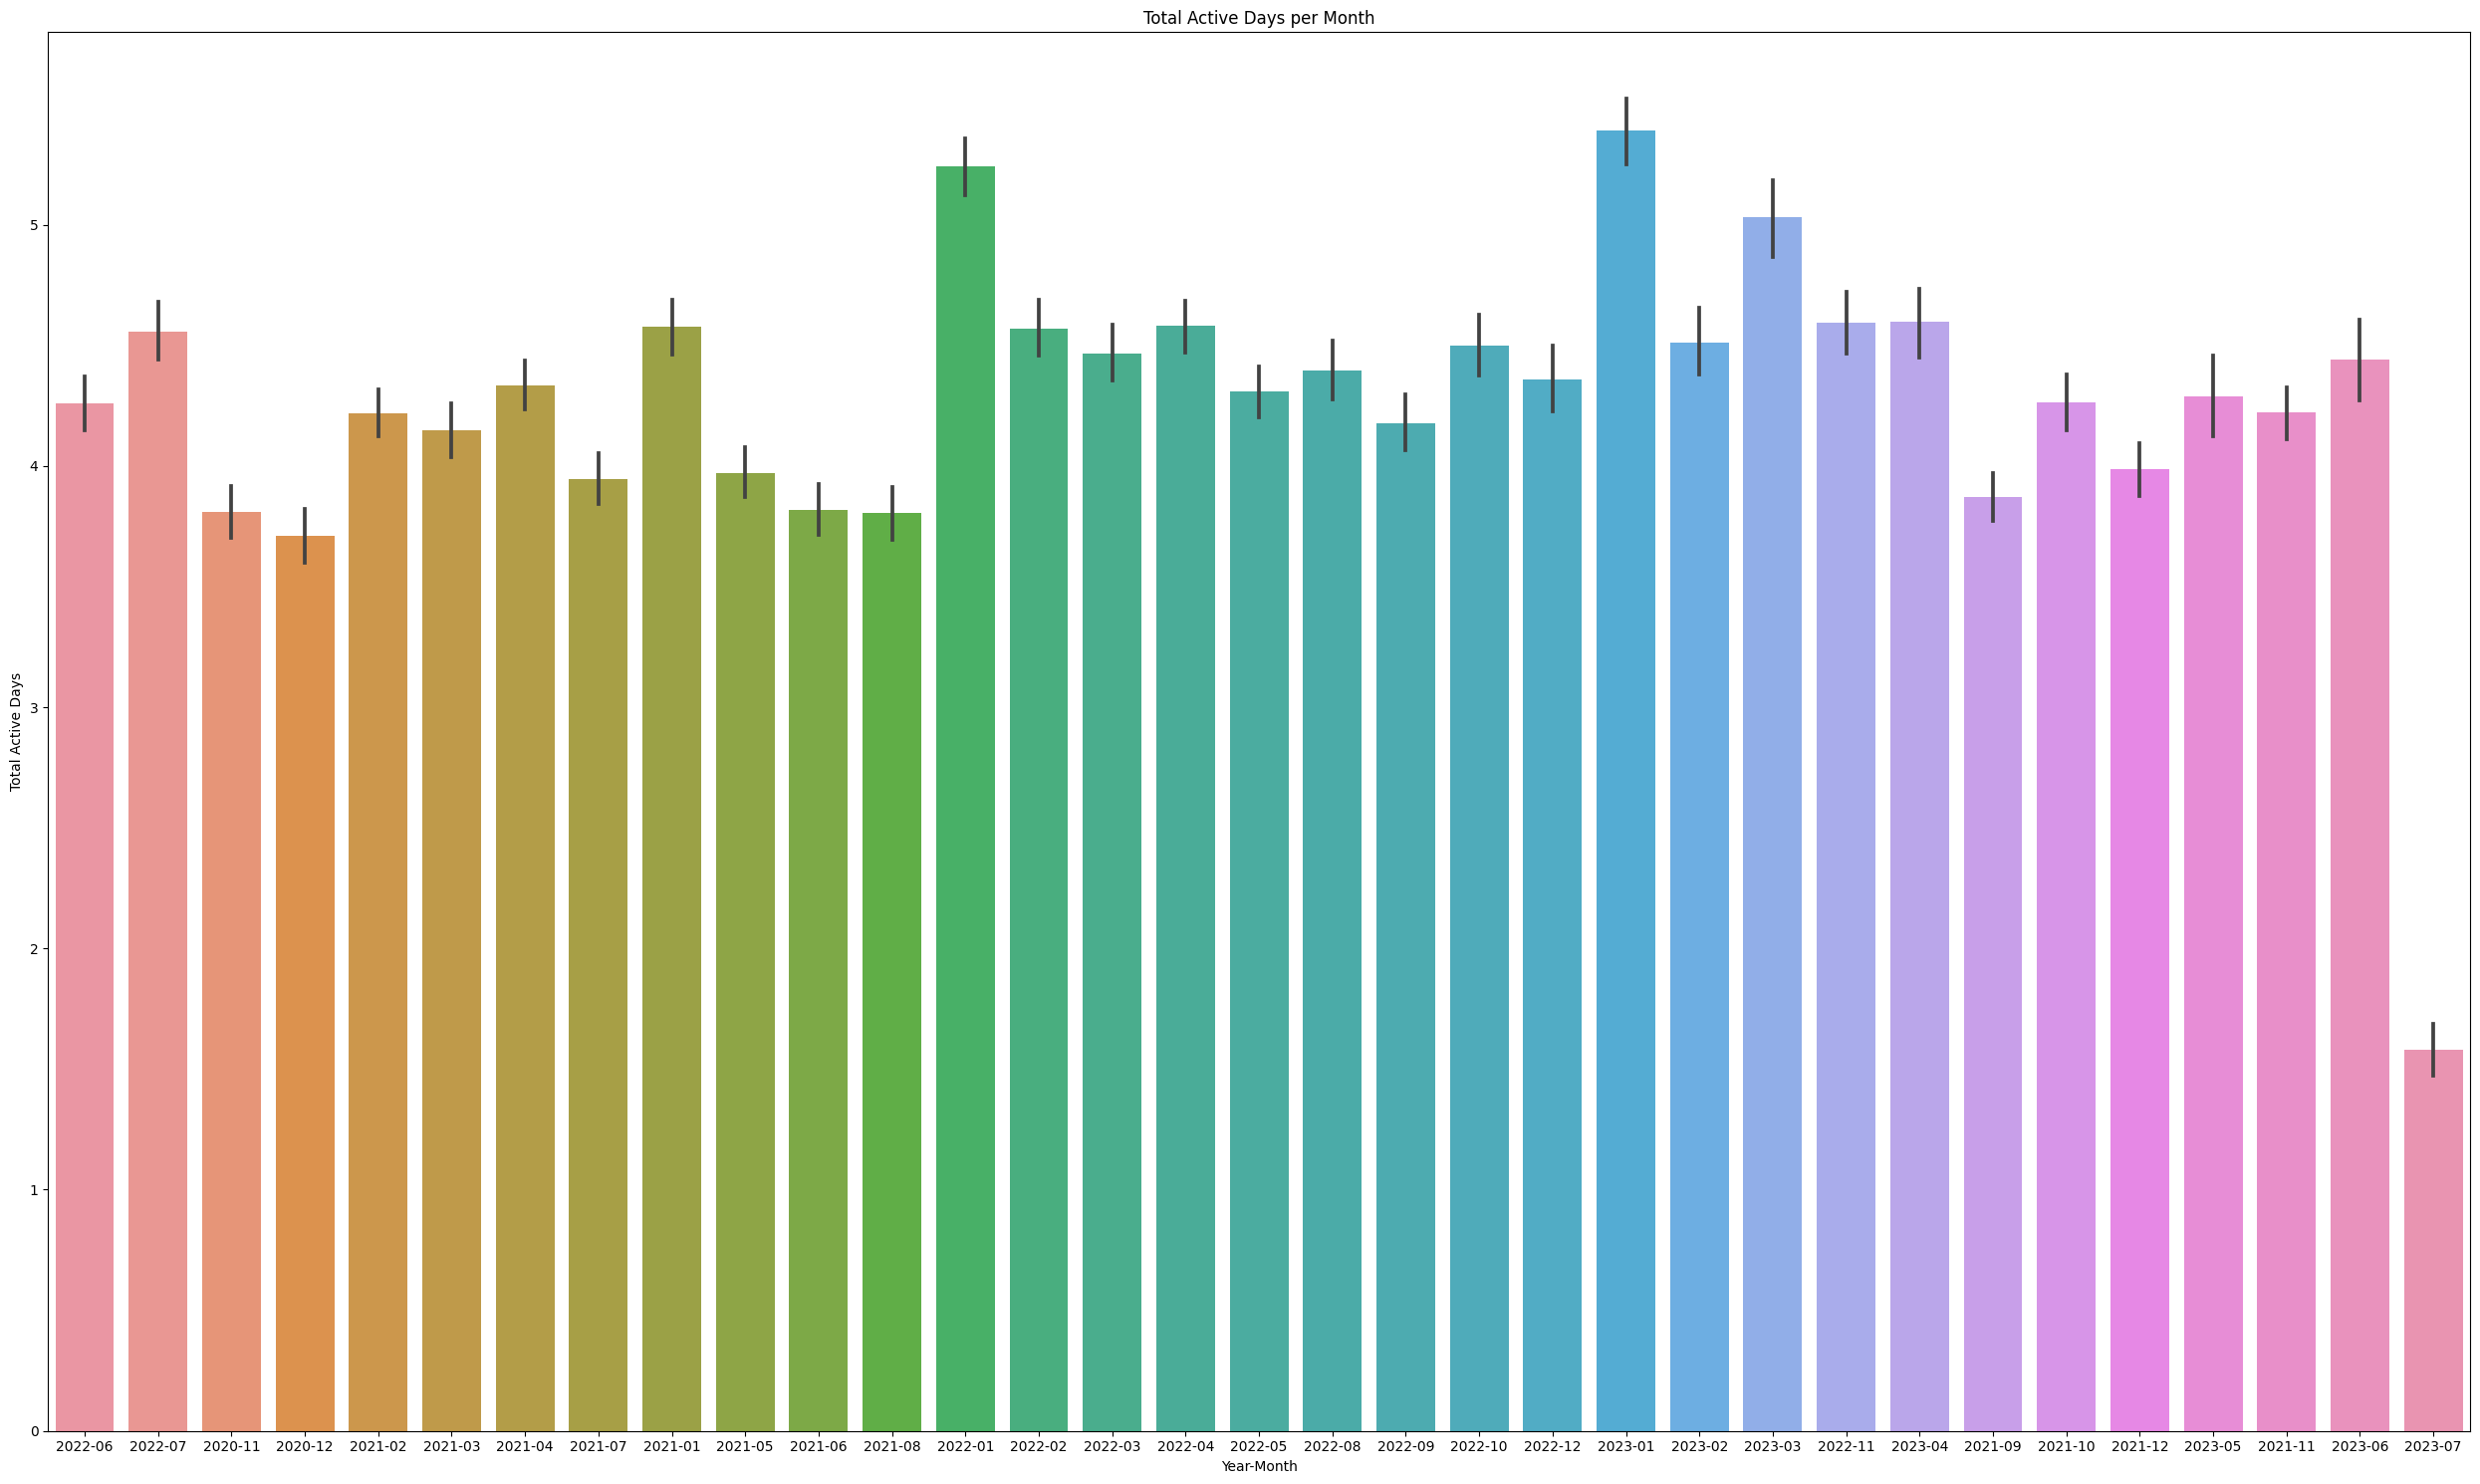

In [10]:
plt.figure(figsize=(25, 15))
sns.barplot(x='Year_Month', y='Active_Days', data=user_monthly_data)
plt.xlabel('Year-Month')
plt.ylabel('Total Active Days')
plt.title('Total Active Days per Month')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [11]:
user_monthly_data['Total_Days'] = user_monthly_data['Year_Month'].dt.days_in_month
user_monthly_data

,ID,Year_Month,Active_Days,Total_Days
0,5000075,2022-06,9,30
1,5000075,2022-07,4,31
2,5000121,2020-11,7,30
3,5000121,2020-12,9,31
4,5000121,2021-02,1,28
...,...,...,...,...
182115,5999967,2021-06,4,30
182116,5999967,2021-09,1,30
182117,5999967,2022-05,1,31
182118,5999967,2022-08,4,31


#Visualization

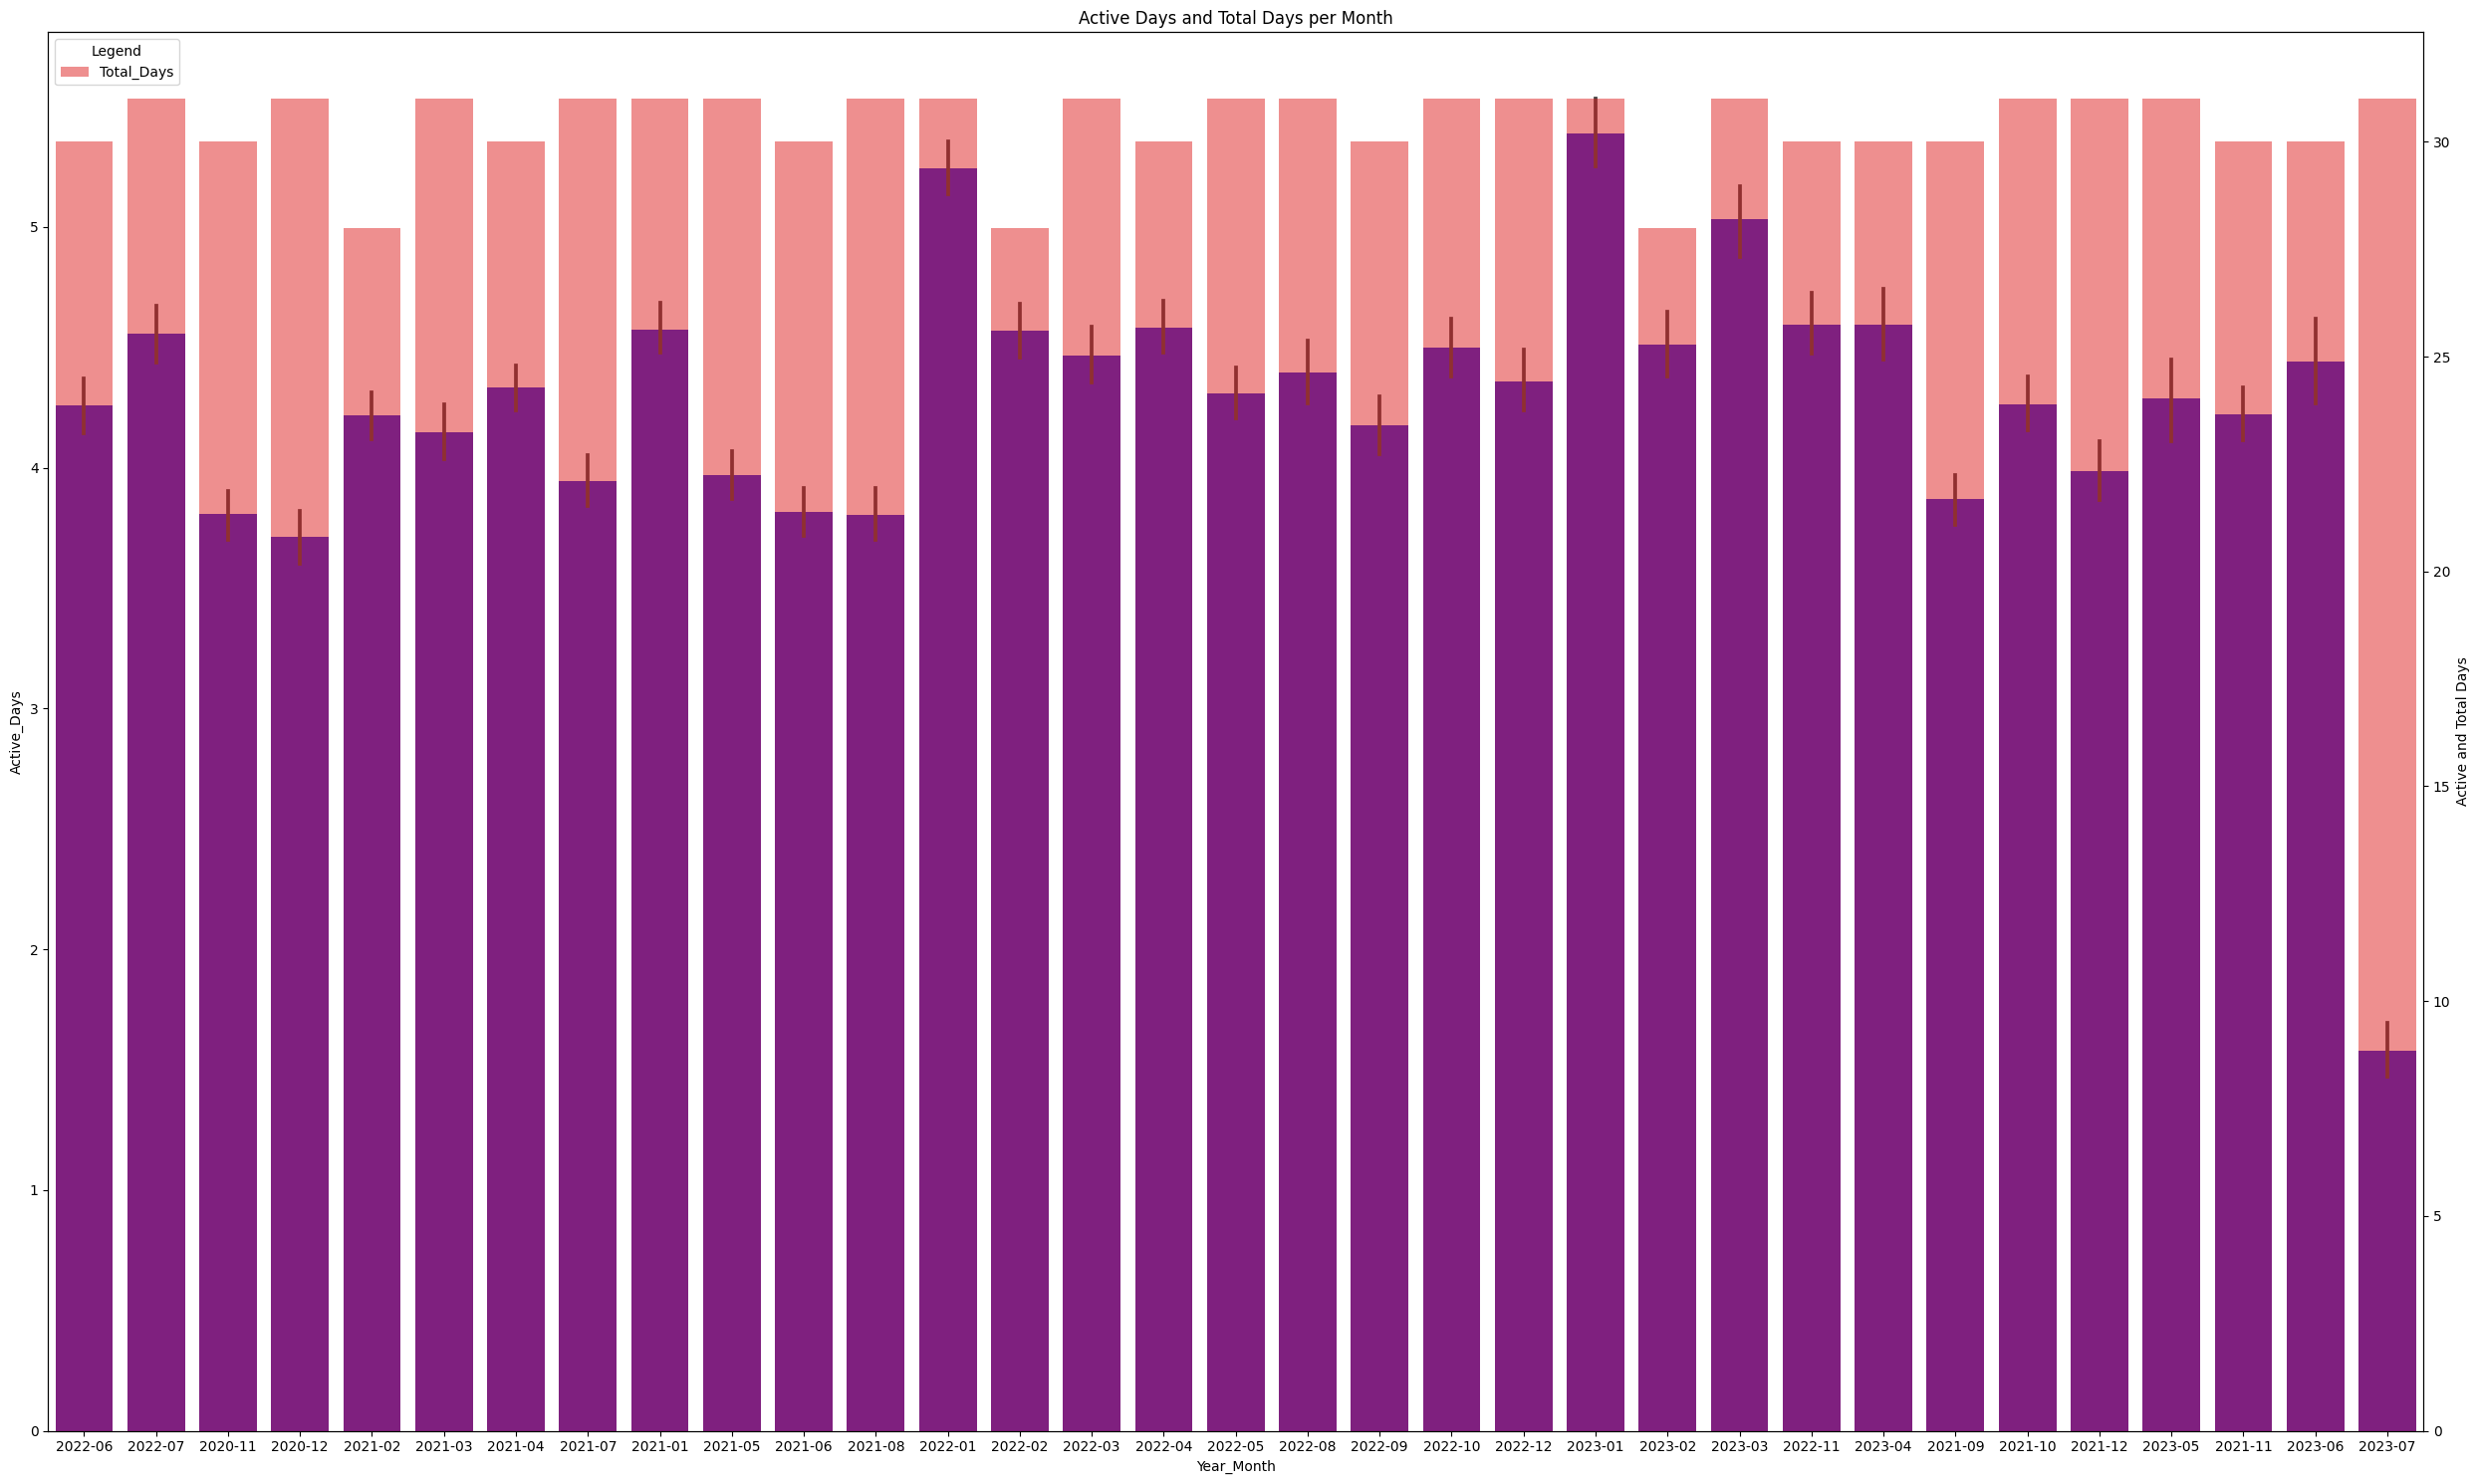

In [12]:
plt.figure(figsize=(25, 15))
sns.barplot(x='Year_Month', y='Active_Days', data=user_monthly_data, label='Active_Days', color='blue')
ax2 = plt.twinx()
sns.barplot(x='Year_Month', y='Total_Days', data=user_monthly_data, label='Total_Days', color='red', alpha=0.5, ax=ax2)
plt.xlabel('Year-Month')
plt.ylabel('Active and Total Days')
plt.title('Active Days and Total Days per Month')
plt.legend(loc='upper left', title='Legend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
user_monthly_data['Percentage_Active'] = (user_monthly_data['Active_Days'] / user_monthly_data['Total_Days']) * 100

In [14]:
user_monthly_data.info

<bound method DataFrame.info of              ID Year_Month  Active_Days  Total_Days  Percentage_Active
0       5000075    2022-06            9          30          30.000000
1       5000075    2022-07            4          31          12.903226
2       5000121    2020-11            7          30          23.333333
3       5000121    2020-12            9          31          29.032258
4       5000121    2021-02            1          28           3.571429
...         ...        ...          ...         ...                ...
182115  5999967    2021-06            4          30          13.333333
182116  5999967    2021-09            1          30           3.333333
182117  5999967    2022-05            1          31           3.225806
182118  5999967    2022-08            4          31          12.903226
182119  5999967    2023-06            2          30           6.666667

[182120 rows x 5 columns]>

Line Plot of 'Percentage_Active' Over Time:
This will show how 'Percentage_Active' changes over time.

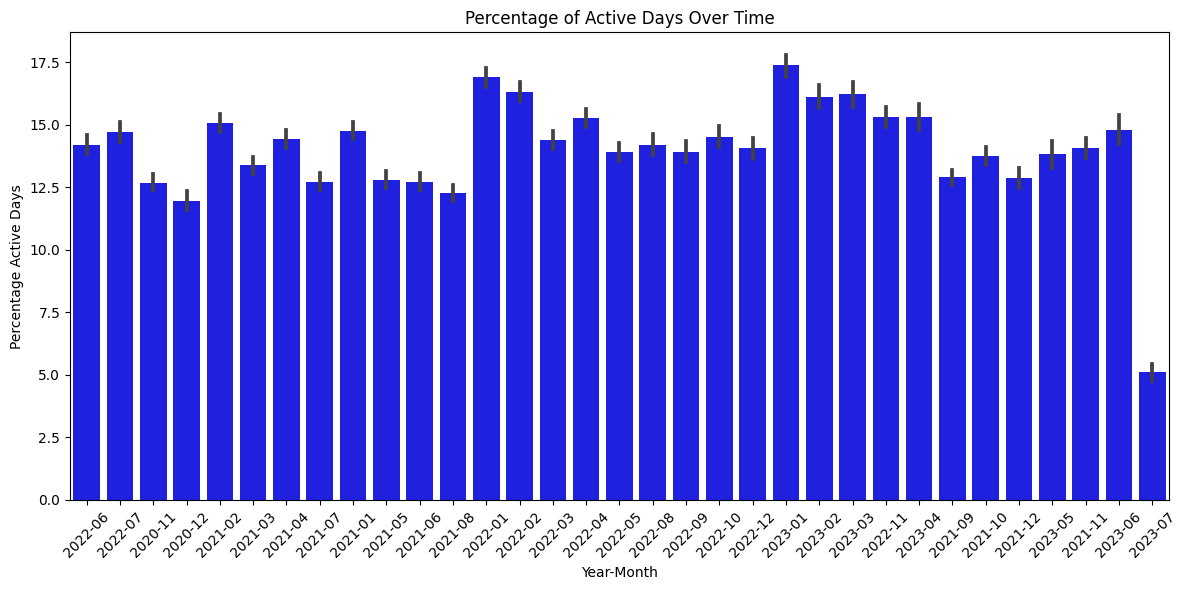

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year_Month', y='Percentage_Active', data=user_monthly_data, color='blue')
plt.xlabel('Year-Month')
plt.ylabel('Percentage Active Days')
plt.title('Percentage of Active Days Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
user_monthly_data.max

<bound method NDFrame._add_numeric_operations.<locals>.max of              ID Year_Month  Active_Days  Total_Days  Percentage_Active
0       5000075    2022-06            9          30          30.000000
1       5000075    2022-07            4          31          12.903226
2       5000121    2020-11            7          30          23.333333
3       5000121    2020-12            9          31          29.032258
4       5000121    2021-02            1          28           3.571429
...         ...        ...          ...         ...                ...
182115  5999967    2021-06            4          30          13.333333
182116  5999967    2021-09            1          30           3.333333
182117  5999967    2022-05            1          31           3.225806
182118  5999967    2022-08            4          31          12.903226
182119  5999967    2023-06            2          30           6.666667

[182120 rows x 5 columns]>

# particular ID

In [17]:
user_data = user_monthly_data[user_monthly_data['ID'] == 5999967]
user_data


,ID,Year_Month,Active_Days,Total_Days,Percentage_Active
182110,5999967,2020-11,18,30,60.000000
182111,5999967,2020-12,2,31,6.451613
182112,5999967,2021-01,8,31,25.806452
182113,5999967,2021-02,6,28,21.428571
182114,5999967,2021-05,3,31,9.677419
182115,5999967,2021-06,4,30,13.333333
182116,5999967,2021-09,1,30,3.333333
182117,5999967,2022-05,1,31,3.225806
182118,5999967,2022-08,4,31,12.903226
182119,5999967,2023-06,2,30,6.666667


#2.1.% of Days Active in a year

In [18]:
user_monthly_data['Year'] = user_monthly_data['Year_Month'].dt.year
user_monthly_data

,ID,Year_Month,Active_Days,Total_Days,Percentage_Active,Year
0,5000075,2022-06,9,30,30.000000,2022
1,5000075,2022-07,4,31,12.903226,2022
2,5000121,2020-11,7,30,23.333333,2020
3,5000121,2020-12,9,31,29.032258,2020
4,5000121,2021-02,1,28,3.571429,2021
...,...,...,...,...,...,...
182115,5999967,2021-06,4,30,13.333333,2021
182116,5999967,2021-09,1,30,3.333333,2021
182117,5999967,2022-05,1,31,3.225806,2022
182118,5999967,2022-08,4,31,12.903226,2022


to visualize the annual percentage of active days for each year.

In [19]:
annual_percentage_active = user_monthly_data.groupby('Year')['Active_Days'].sum() / user_monthly_data.groupby('Year')['Total_Days'].sum() * 100

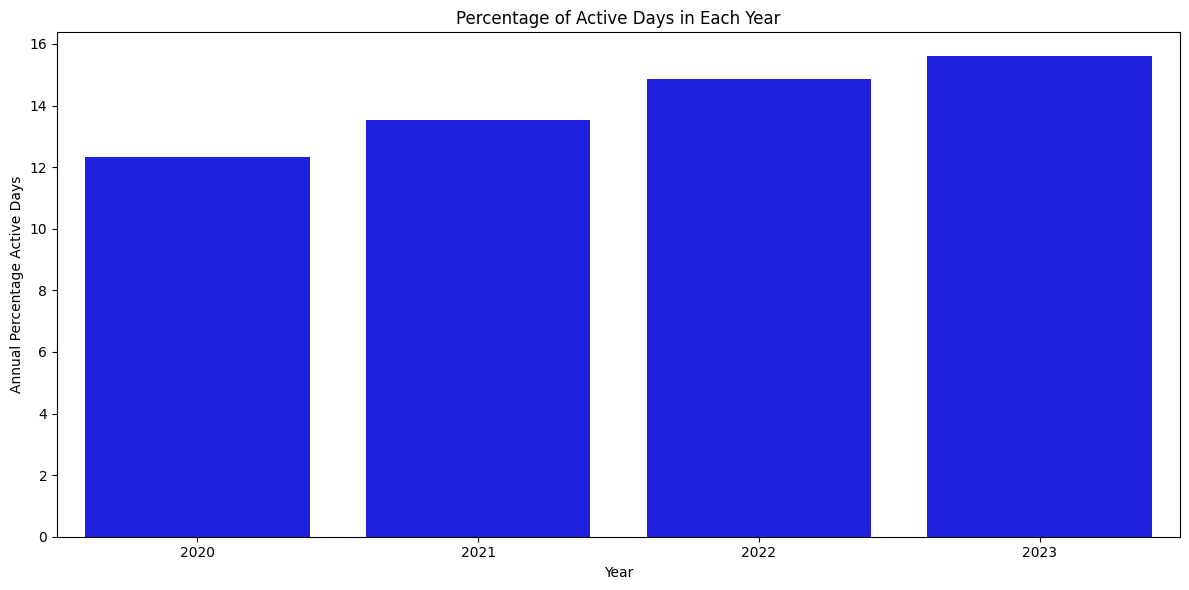

In [20]:
plt.figure(figsize=(12, 6))

# Create a bar plot for 'Year' vs 'Annual Percentage Active'
sns.barplot(x=annual_percentage_active.index, y=annual_percentage_active.values, color='blue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Annual Percentage Active Days')
plt.title('Percentage of Active Days in Each Year')

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
user_yearly_data = user_monthly_data.groupby(['ID', 'Year'])[['Active_Days', 'Total_Days']].sum().reset_index()
user_yearly_data['Percentage_Active'] = (user_yearly_data['Active_Days'] / user_yearly_data['Total_Days']) * 100
user_yearly_data.sort_values(by=['Percentage_Active', 'Active_Days'], ascending=[True, False], inplace=True)
user_yearly_data.head(10)

,ID,Year,Active_Days,Total_Days,Percentage_Active
24611,5506388,2021,6,186,3.225806
7880,5164330,2021,4,124,3.225806
9140,5190181,2022,4,124,3.225806
21031,5433262,2021,4,124,3.225806
33334,5689662,2021,4,124,3.225806
33464,5691497,2022,4,124,3.225806
35691,5737294,2021,4,124,3.225806
42354,5877862,2021,4,124,3.225806
43358,5900331,2022,4,124,3.225806
47307,5985169,2021,4,124,3.225806


Bar Plot of Annual Average Percentage Active by Year:

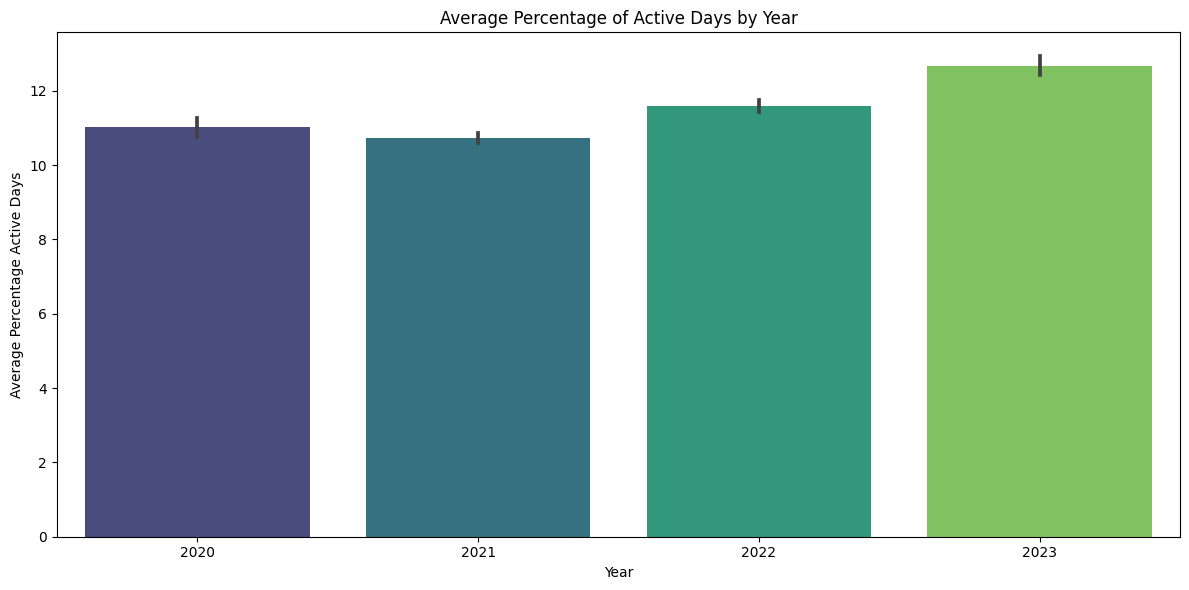

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Percentage_Active', data=user_yearly_data, palette='viridis')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Percentage Active Days')
plt.title('Average Percentage of Active Days by Year')

# Display the plot
plt.tight_layout()
plt.show()

# particular ID

In [23]:
per_user = user_yearly_data[user_yearly_data['ID'] == 5999967]
per_user

,ID,Year,Active_Days,Total_Days,Percentage_Active
48056,5999967,2023,2,30,6.666667
48055,5999967,2022,5,62,8.064516
48054,5999967,2021,22,150,14.666667
48053,5999967,2020,20,61,32.786885


# 4. overall level - watch or screen time %

In [24]:
total_watch_time_per_user = day_data.groupby('ID')['total_watch_time'].sum().reset_index()
total_watch_time_per_user

,ID,total_watch_time
0,5000075,1062.230000
1,5000121,975.060000
2,5000281,4306.820000
3,5000313,1429.100000
4,5000329,220.640000
...,...,...
23814,5999834,28.720000
23815,5999941,8838.078255
23816,5999943,0.500000
23817,5999966,4228.536667


In [25]:
per_user_id = total_watch_time_per_user[total_watch_time_per_user['ID'] == 5999967]
per_user_id

,ID,total_watch_time
23818,5999967,2111.227745


 We want to visualize the distribution of 'total_watch_time' across different IDs

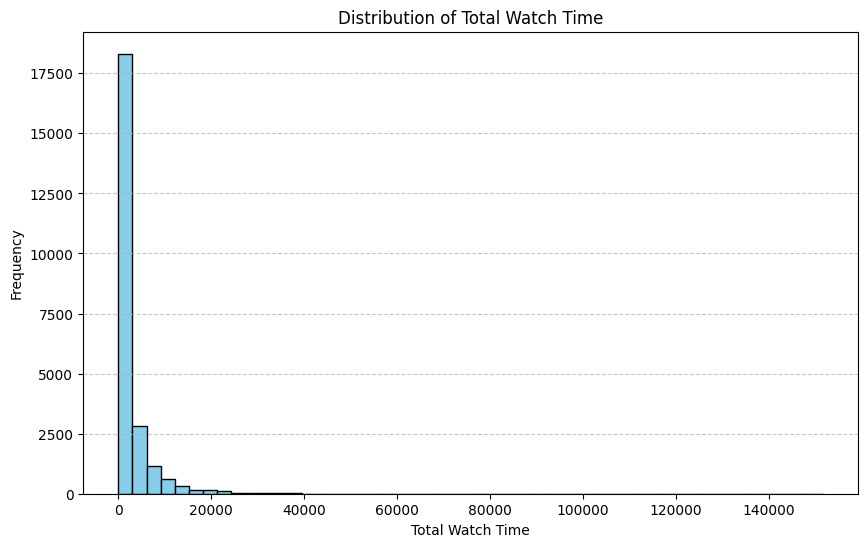

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(total_watch_time_per_user['total_watch_time'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Watch Time')
plt.xlabel('Total Watch Time')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()

# monthly & yearly calculation for overall_watch_time cheyali

In [27]:
overall_watch_time = total_watch_time_per_user['total_watch_time'].sum()
overall_watch_time

58787076.907187335

In [28]:
total_watch_time_per_user['Watch_time_percentage'] = (total_watch_time_per_user['total_watch_time'] / overall_watch_time) * 100
total_watch_time_per_user.info

<bound method DataFrame.info of             ID  total_watch_time  Watch_time_percentage
0      5000075       1062.230000           1.806911e-03
1      5000121        975.060000           1.658630e-03
2      5000281       4306.820000           7.326134e-03
3      5000313       1429.100000           2.430976e-03
4      5000329        220.640000           3.753206e-04
...        ...               ...                    ...
23814  5999834         28.720000           4.885427e-05
23815  5999941       8838.078255           1.503405e-02
23816  5999943          0.500000           8.505271e-07
23817  5999966       4228.536667           7.192970e-03
23818  5999967       2111.227745           3.591313e-03

[23819 rows x 3 columns]>


Scatter Plot for 'total_watch_time_percentage%'

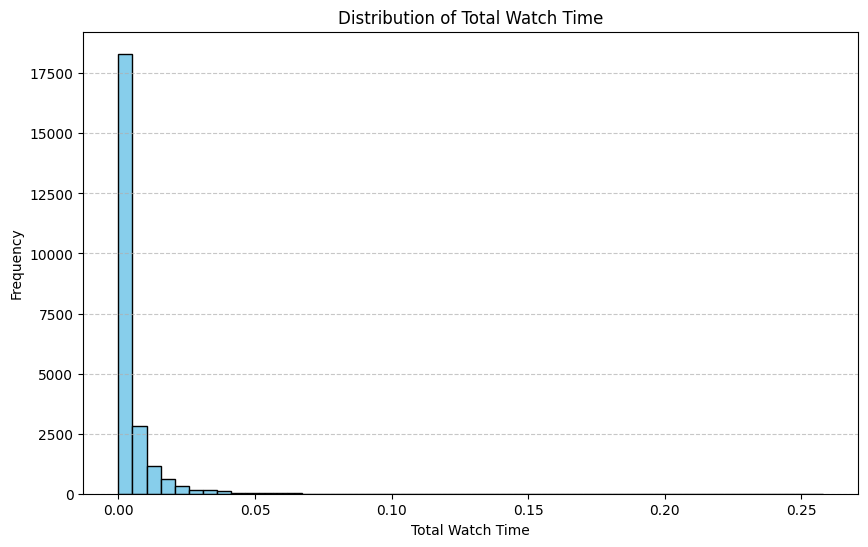

In [29]:
# Create a histogram for 'total_watch_time_percentage'
plt.figure(figsize=(10, 6))
plt.hist(total_watch_time_per_user['Watch_time_percentage'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Watch Time')
plt.xlabel('Total Watch Time')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# particular ID

In [30]:
perticular_user = total_watch_time_per_user[total_watch_time_per_user['ID'] == 5999967]
perticular_user

,ID,total_watch_time,Watch_time_percentage
23818,5999967,2111.227745,0.003591


# 4.1.To analyze the overall watch time in month-level data

In [31]:
#Data Frame Creation
month_data = pd.DataFrame(month_data)

In [32]:
monthly_watch_time = month_data.groupby(['Year', 'Month'])['total_watch_time'].sum().reset_index()
monthly_watch_time

,Year,Month,total_watch_time
0,2020,11,9.849714e+05
1,2020,12,9.422561e+05
2,2021,1,1.796257e+06
3,2021,2,1.750759e+06
4,2021,3,1.650812e+06
5,2021,4,2.026969e+06
6,2021,5,1.517368e+06
7,2021,6,1.016879e+06
8,2021,7,1.078719e+06
9,2021,8,1.259336e+06


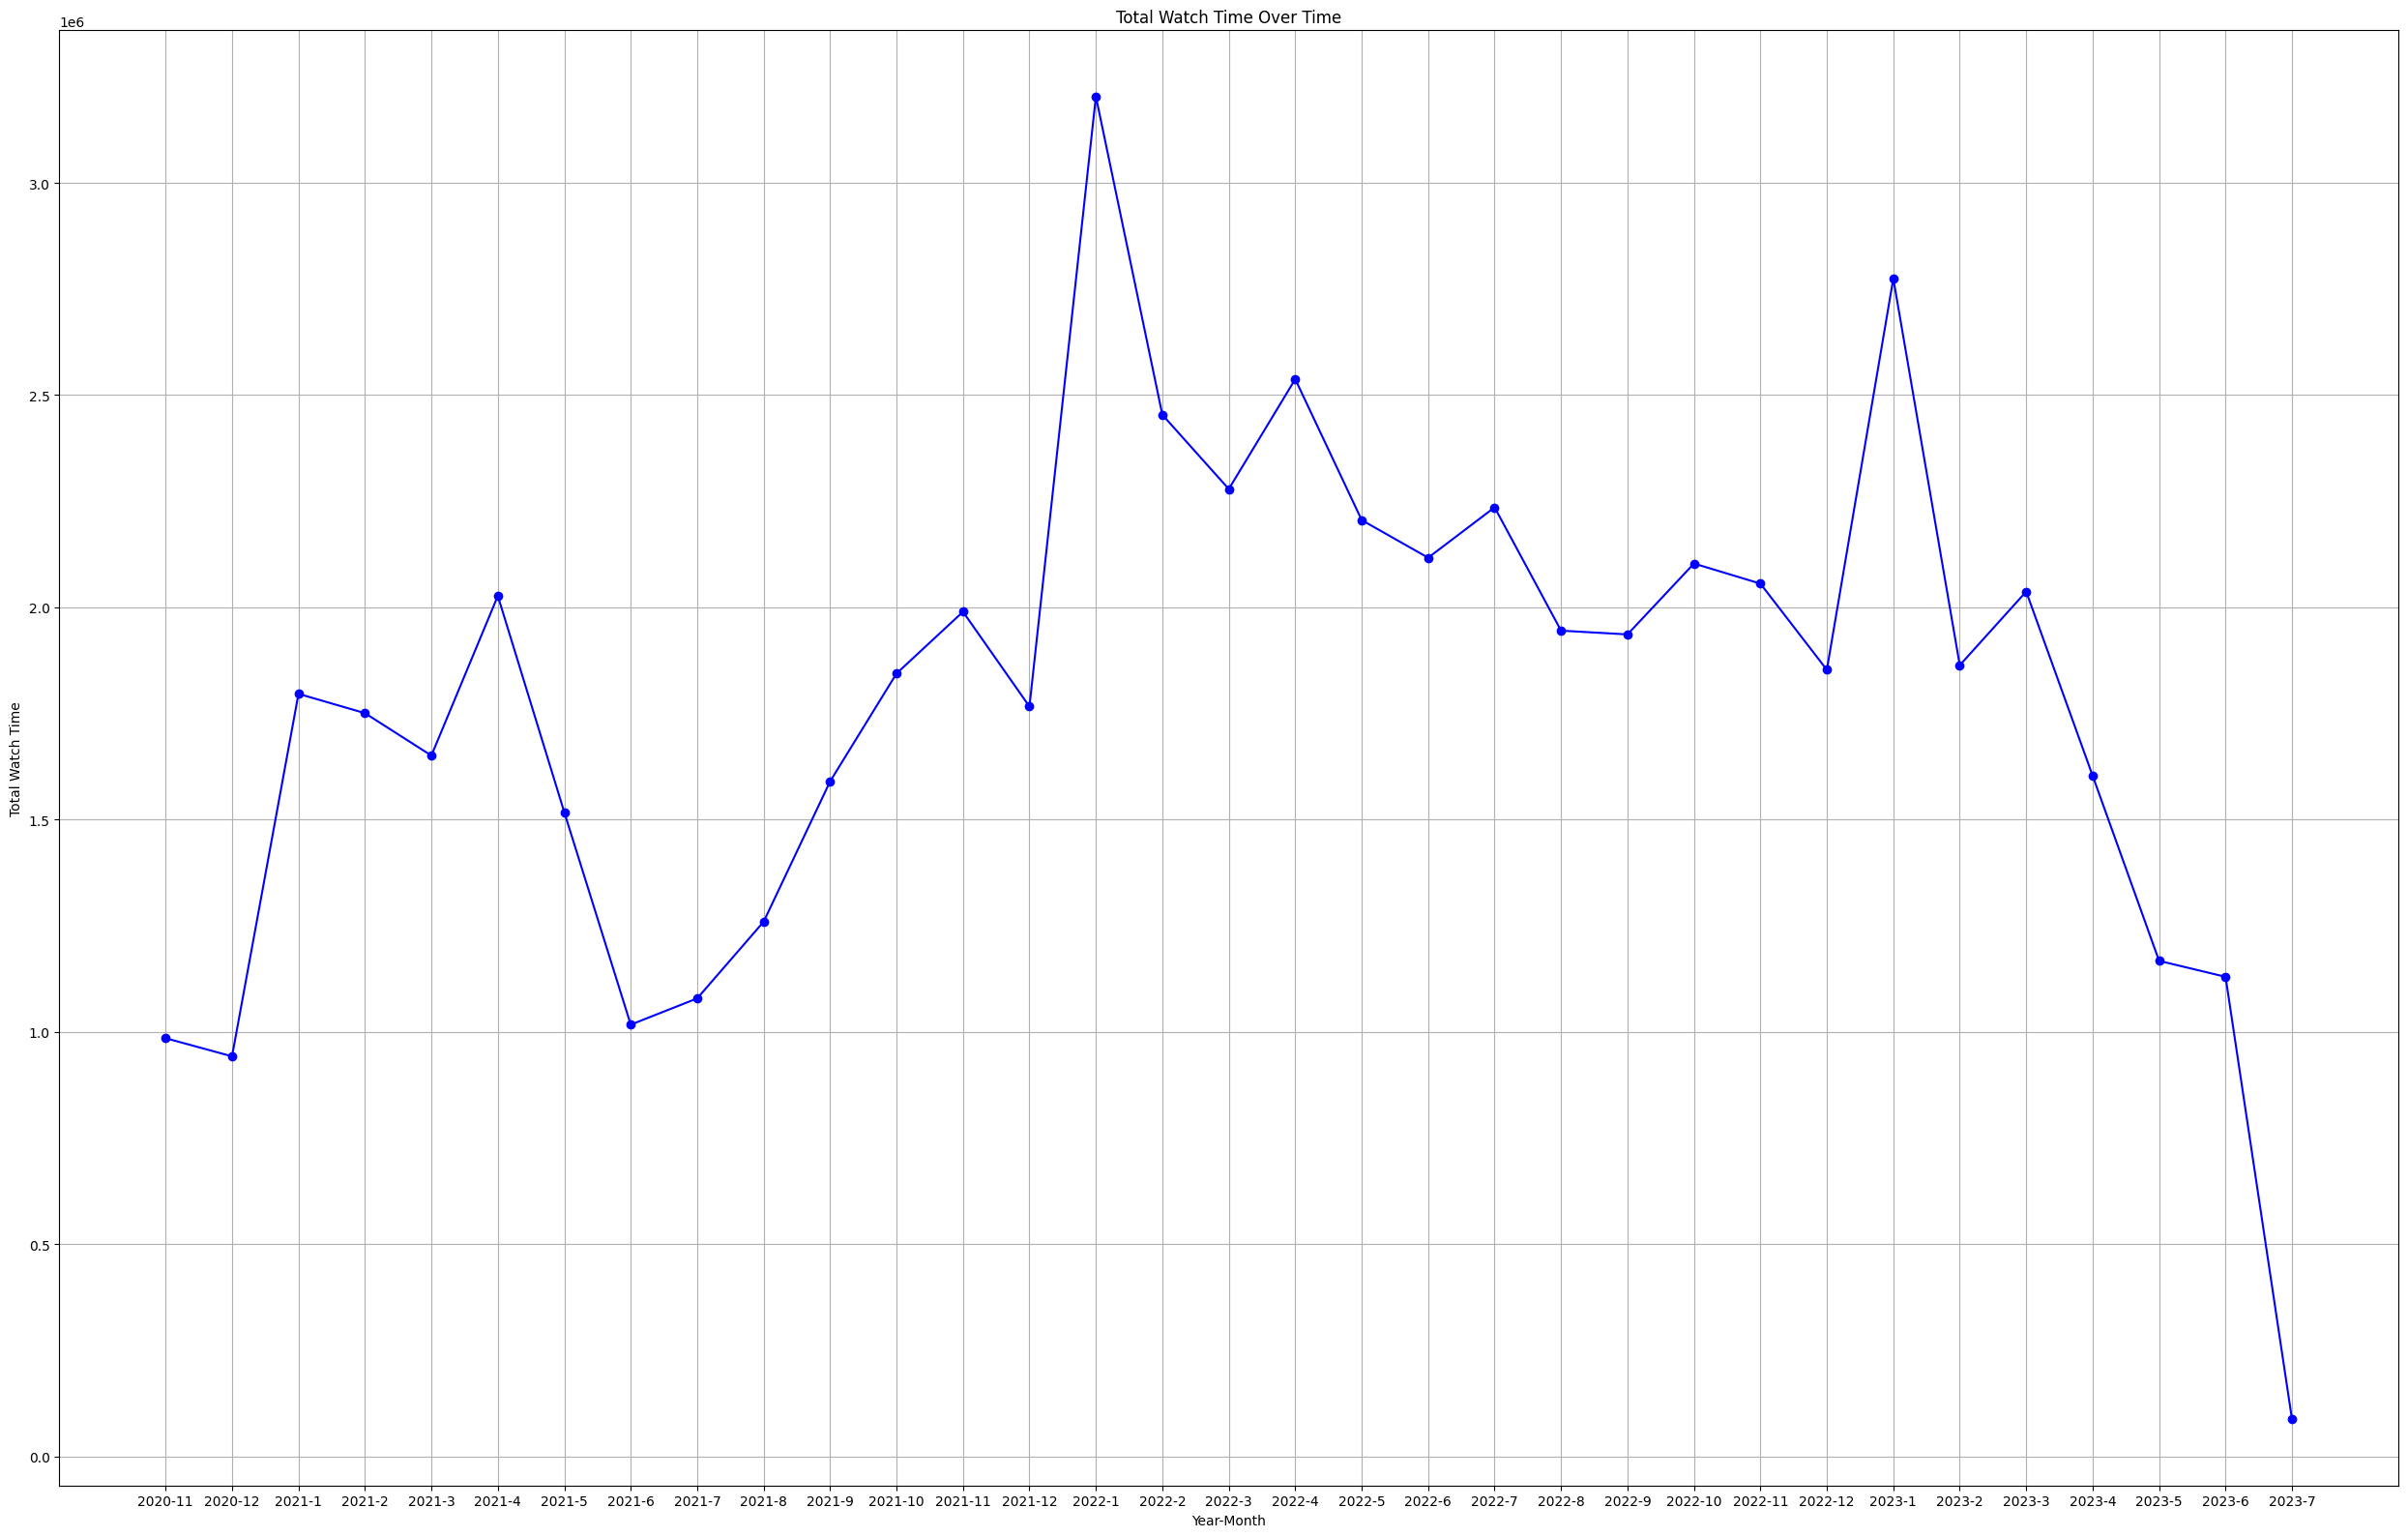

In [33]:
plt.figure(figsize=(25, 16))
plt.plot(monthly_watch_time['Year'].astype(str) + '-' + monthly_watch_time['Month'].astype(str), monthly_watch_time['total_watch_time'], marker='o', color='blue', linestyle='-')
plt.title('Total Watch Time Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Watch Time')
plt.xticks(rotation=360)
plt.grid(True)
plt.tight_layout()

# Show the line plot
plt.show()


#4.2.To calculate the year-level total watch time percentage

In [34]:
month_data = pd.DataFrame(month_data)

In [35]:
month_data['Year'] = month_data['Year'].astype(str).str[:4].astype(int)

In [36]:
yearly_watch_time = month_data.groupby('Year')['total_watch_time'].sum().reset_index()
yearly_watch_time

,Year,total_watch_time
0,2020,1.927228e+06
1,2021,1.928714e+07
2,2022,2.692486e+07
3,2023,1.066256e+07


will provide a clear view of how 'total_watch_time' has evolved over the years, allowing you to analyze any trends or changes in watch time over different years.

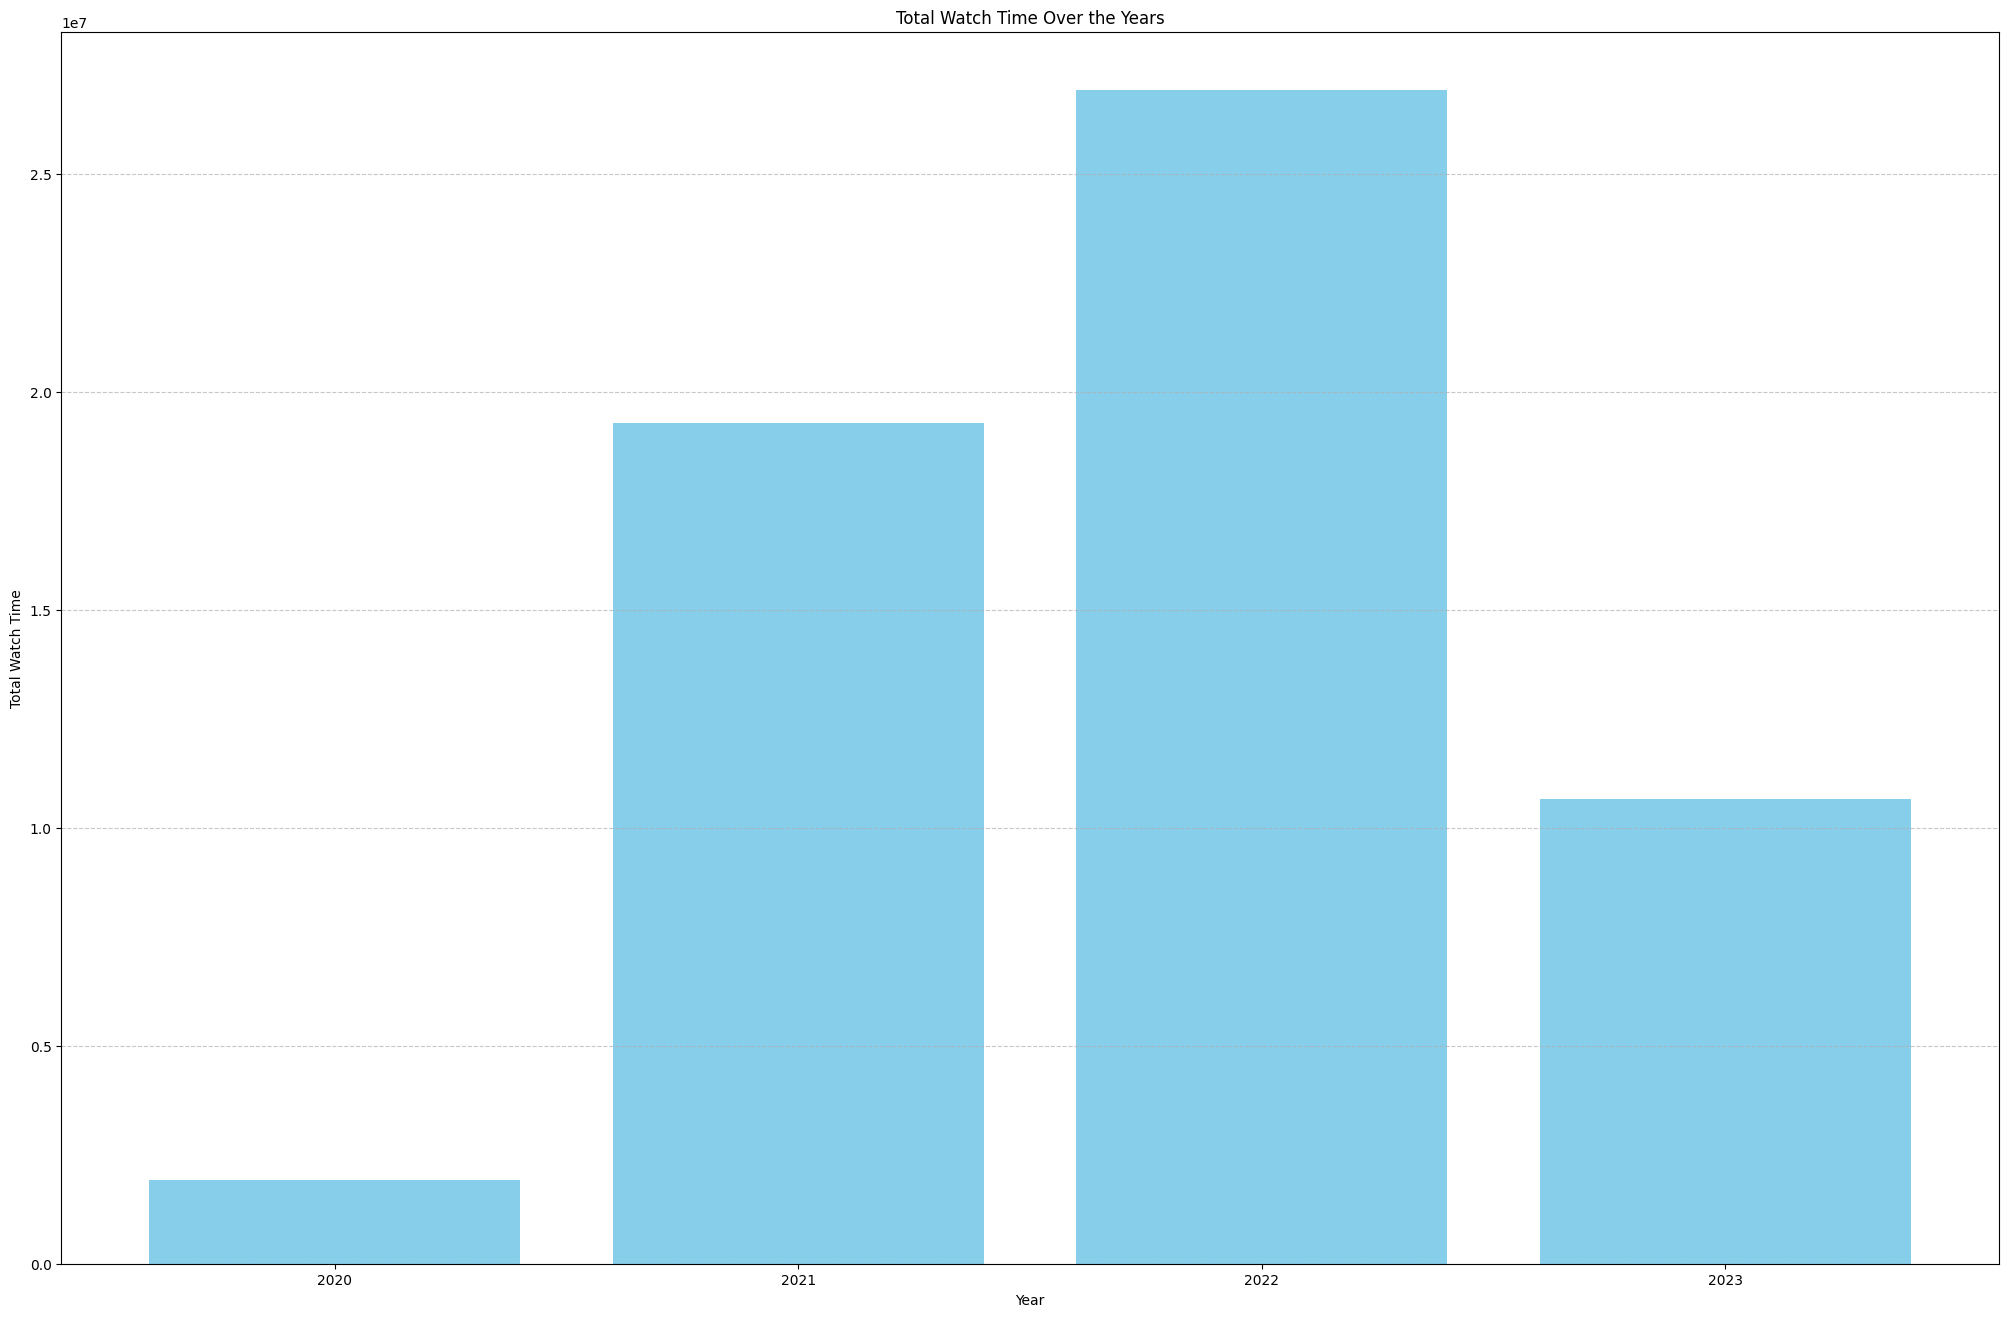

In [37]:
plt.figure(figsize=(25, 16))
plt.bar(yearly_watch_time['Year'], yearly_watch_time['total_watch_time'], color='skyblue')
plt.title('Total Watch Time Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Watch Time')
plt.xticks(yearly_watch_time['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar plot
plt.show()

In [38]:
overall_watch_time = month_data['total_watch_time'].sum()
yearly_watch_time

,Year,total_watch_time
0,2020,1.927228e+06
1,2021,1.928714e+07
2,2022,2.692486e+07
3,2023,1.066256e+07


In [39]:
yearly_watch_time['Watch_time_percentage'] = (yearly_watch_time['total_watch_time'] / overall_watch_time) * 100
yearly_watch_time

,Year,total_watch_time,Watch_time_percentage
0,2020,1.927228e+06,3.277499
1,2021,1.928714e+07,32.800257
2,2022,2.692486e+07,45.789184
3,2023,1.066256e+07,18.133060


---------------------------------------------------

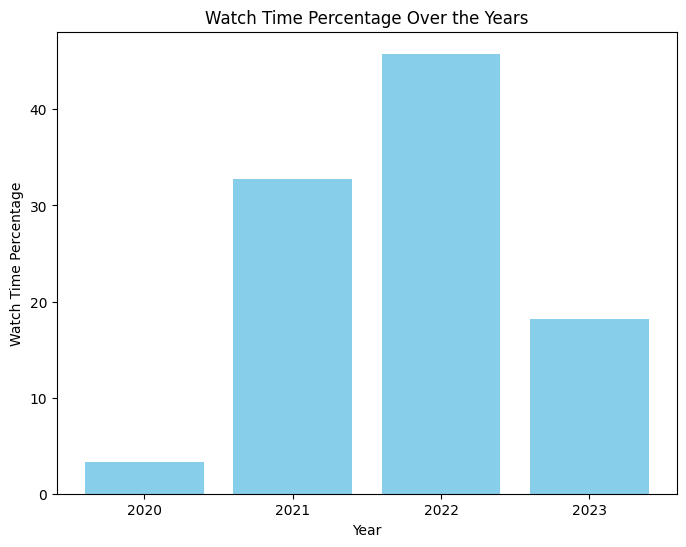

In [40]:
plt.figure(figsize=(8, 6))
plt.bar(yearly_watch_time['Year'], yearly_watch_time['Watch_time_percentage'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Watch Time Percentage')
plt.title('Watch Time Percentage Over the Years')
plt.xticks(yearly_watch_time['Year'])
plt.show()

In [41]:
watch_time_percentage_stats = yearly_watch_time['Watch_time_percentage'].describe()
watch_time_percentage_stats

count     4.000000
mean     25.000000
std      18.367146
min       3.277499
25%      14.419170
50%      25.466659
75%      36.047489
max      45.789184
Name: Watch_time_percentage, dtype: float64

In [42]:
month_data_with_show = month_data.merge(show_data[['ID', 'show_title']], on='ID', how='left')

In [43]:
show_watch_time = month_data_with_show.groupby('show_title')['total_watch_time'].sum()
show_watch_time = show_watch_time.reset_index()
show_watch_time

,show_title,total_watch_time
0,"""The Roosevelts: An Intimate Portrait"" Panel D...",1456.04000
1,"#MeToo, Now What?",3798.98000
2,10 Days in Watts,4046.83764
3,10 That Changed America,15114.79000
4,"100 Days, Dishes, Drinks & Destinations",1808.81000
...,...,...
3271,tasteMAKERS,11316.44000
3272,unMASKing Hope,17.80000
3273,xConnect Northwest,906.23000
3274,"¿Que Pasa, USA?",508.83000


In [44]:
df_sorted = show_watch_time.sort_values(by='total_watch_time', ascending=False)
df_sorted

,show_title,total_watch_time
1202,I Remember,151596.976667
3162,Welcome to My Farm,151596.976667
3171,Wheaton College Christmas Festival: Through Hi...,151596.976667
430,Boxcar People,151596.976667
1863,North Coast Cuisine,151596.976667
...,...,...
1368,Journey on the Trans-Siberian Railway,0.270000
1085,Great Scenic Railway Journeys,0.270000
2396,SnapShot,0.080000
189,American Voices,0.070000


# these are the **top 10 shows** are highly watch_time

In [45]:
df_sorted.head(10)

,show_title,total_watch_time
1202,I Remember,151596.976667
3162,Welcome to My Farm,151596.976667
3171,Wheaton College Christmas Festival: Through Hi...,151596.976667
430,Boxcar People,151596.976667
1863,North Coast Cuisine,151596.976667
3086,WILL Documentaries,151596.976667
2576,The Bozeman Trail,151596.976667
912,Feast TV,151596.976667
1730,Moveable Feast with Relish,151596.976667
1375,Julie Taboulie's Lebanese Kitchen,151596.976667


In [46]:
show_watch_time['total_watch_time_hours'] = show_watch_time['total_watch_time'].apply(lambda x: x / 60)  # 3600 seconds in an hour

In [47]:
show_watch_time.head(10)

,show_title,total_watch_time,total_watch_time_hours
0,"""The Roosevelts: An Intimate Portrait"" Panel D...",1456.040000,24.267333
1,"#MeToo, Now What?",3798.980000,63.316333
2,10 Days in Watts,4046.837640,67.447294
3,10 That Changed America,15114.790000,251.913167
4,"100 Days, Dishes, Drinks & Destinations",1808.810000,30.146833
5,10thirtysix,14301.533333,238.358889
6,11th and Grant,839.180000,13.986333
7,13 Commandments,6679.870000,111.331167
8,16 for '16 - The Contenders,19645.555745,327.425929
9,180 Days,497.406667,8.290111


# Visualize only the 'Show Title' and 'total_watch_time_hours' columns

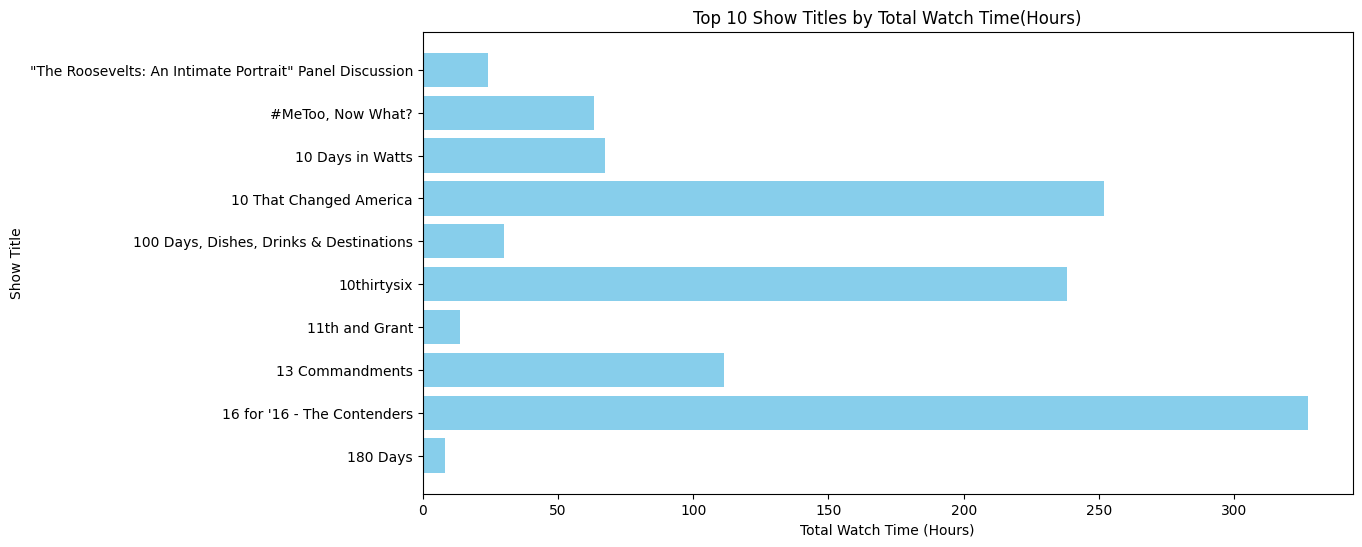

In [48]:
top_10_shows = show_watch_time.head(10)
# Create a bar plot for the top 10 show titles
plt.figure(figsize=(12, 6))
plt.barh(top_10_shows['show_title'], top_10_shows['total_watch_time_hours'], color='skyblue')
plt.xlabel('Total Watch Time (Hours)')
plt.ylabel('Show Title')
plt.title('Top 10 Show Titles by Total Watch Time(Hours)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest total watch time at the top
plt.show()


# 1.Monthly Churned Users % (Calculate the monthly churned users percentage.)

In [49]:
last_watched_dates =day_data.groupby('ID')['Watched_date_only'].max()
last_watched_dates.head(10)

ID
5000075   2022-07-06
5000121   2021-07-12
5000281   2023-03-26
5000313   2023-04-05
5000329   2021-09-19
5000350   2022-02-14
5000426   2022-07-27
5000432   2023-03-31
5000438   2022-02-13
5000467   2022-03-03
Name: Watched_date_only, dtype: datetime64[ns]

In [50]:
churned_users = last_watched_dates.groupby([last_watched_dates.dt.year, last_watched_dates.dt.month]).count()
churned_users

Watched_date_only  Watched_date_only
2020               11                    357
                   12                    321
2021               1                     533
                   2                     628
                   3                     474
                   4                     623
                   5                     601
                   6                     490
                   7                     521
                   8                     493
                   9                     474
                   10                    487
                   11                    564
                   12                    474
2022               1                     778
                   2                     648
                   3                     658
                   4                     743
                   5                     700
                   6                     608
                   7                     595
                  

In [51]:
total_users_per_month = month_data.groupby(['Year', 'Month'])['ID'].nunique()
print(total_users_per_month)
# Calculate monthly churned users percentage
churned_users_percentage = (churned_users / total_users_per_month) * 100

Year  Month
2020  11       4874
      12       4756
2021  1        6725
      2        6942
      3        6101
      4        6780
      5        6205
      6        5730
      7        5809
      8        5715
      9        5739
      10       5930
      11       5871
      12       5540
2022  1        7366
      2        6610
      3        6657
      4        6942
      5        6497
      6        6074
      7        6007
      8        5475
      9        5469
      10       5666
      11       5503
      12       5050
2023  1        5860
      2        4813
      3        4402
      4        4066
      5        3333
      6        3023
      7         591
Name: ID, dtype: int64


columns names problem for churn%

# 1.2.Yearly Churned Users %

In [52]:
last_watched_year = day_data.groupby('ID')['Watched_date_only'].max()
last_watched_year

ID
5000075   2022-07-06
5000121   2021-07-12
5000281   2023-03-26
5000313   2023-04-05
5000329   2021-09-19
             ...    
5999834   2022-04-16
5999941   2023-02-21
5999943   2021-05-25
5999966   2023-07-01
5999967   2023-06-06
Name: Watched_date_only, Length: 23819, dtype: datetime64[ns]

In [53]:
churned_users_yearly = last_watched_year.groupby([last_watched_dates.dt.year]).count()
churned_users_yearly

Watched_date_only
2020     678
2021    6362
2022    8010
2023    8769
Name: Watched_date_only, dtype: int64

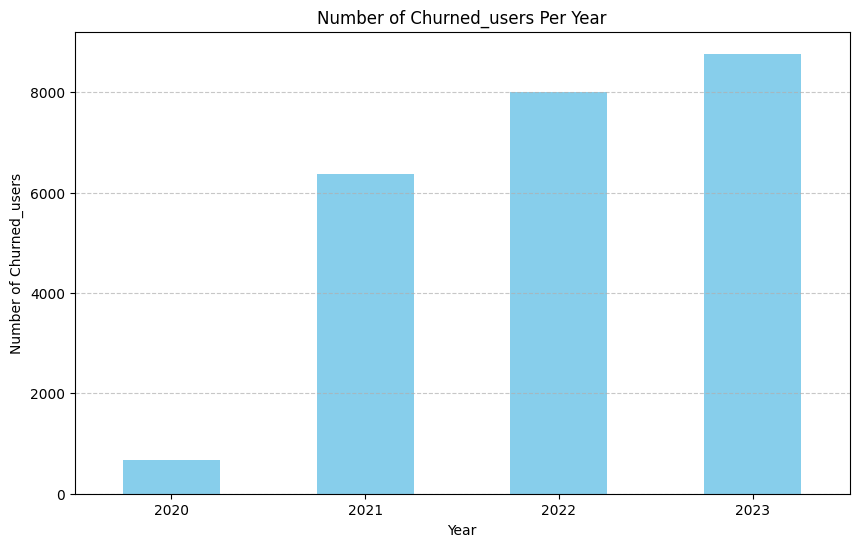

In [54]:
plt.figure(figsize=(10, 6))
churned_users_yearly.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Churned_users')
plt.title('Number of Churned_users Per Year')
plt.xticks(rotation=360)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. user lifespan - no of shows/content watched, time spent - distribution

In [55]:
missing_values = day_data.isnull().sum()
missing_values

Watched_date_only                    0
total_watch_time                     0
Distinct_GENRE_Count                 0
Distinct_Show_Count                  0
Distinct_episodes_Count              0
No_of_times_episodes_watched         0
User_Registered_Date_only          295
FIRST_Paid_CHANNEL               23071
Subscription_Level                   0
Giving_Type                          0
HOUSEHOLD_INCOME                136217
TOUCHPOINTS                          0
PP_Activated                         0
Age                             214611
IS_ON_AirStation                     0
IS_ON_WBTA_Station                   0
Acquired_Source                 257012
ID                                   0
Year_Month                           0
dtype: int64

# Drop Rows with Missing Values:

In [56]:
day_data.dropna(inplace=True)

#  NOTE: Extracts the number of days from the time difference. This effectively calculates the "User Lifespan" in days for each user, which represents how long each user has been active on the platform

In [57]:
user_ls = pd.DataFrame()
# Add ID column to user_ls
user_ls = day_data[['ID']].drop_duplicates()
user_ls['Registration_Date'] = pd.to_datetime(day_data['User_Registered_Date_only'])
user_ls['Last_Watched_Date'] = pd.to_datetime(day_data['Watched_date_only'].max())
user_ls['User_Lifespan'] = (user_ls['Last_Watched_Date'] - user_ls['Registration_Date']).dt.days

In [58]:
user_lifespan = user_ls.groupby('ID')['User_Lifespan'].max().reset_index()
user_lifespan

,ID,User_Lifespan
0,5000121,1217
1,5000329,1139
2,5000426,958
3,5000432,468
4,5000471,1116
...,...,...
11534,5999245,1975
11535,5999552,1311
11536,5999784,3134
11537,5999834,3134


In [59]:
sorted_user_lifespan_data = user_lifespan.sort_values(by='User_Lifespan', ascending=False)
# Get the top 10 users
top_10_users = sorted_user_lifespan_data.head(10)
# Print the top 10 users
top_10_users

,ID,User_Lifespan
3856,5329999,3916
6865,5594214,3916
4622,5399304,3916
6863,5594138,3916
1415,5119964,3916
9615,5835146,3916
1999,5170497,3916
2638,5226030,3916
3947,5338711,3916
9146,5794394,3916


# Particular ID

In [60]:
perticular_id = user_lifespan[user_lifespan['ID'] == 5999967]
perticular_id

,ID,User_Lifespan
11538,5999967,1752


# Users show count whithin the their life span

In [61]:
user_show_count = day_data.groupby('ID')['Distinct_Show_Count'].sum().reset_index()

In [62]:
user_ls = pd.merge(user_ls, user_show_count, on='ID', how='left')

In [63]:
user_ls.rename(columns={'Distinct_Show_Count': 'Shows_Watched'}, inplace=True)
user_ls= user_ls.sort_values(by='User_Lifespan', ascending=False)
user_ls_30 = user_ls.head(30)
user_ls_30

,ID,Registration_Date,Last_Watched_Date,User_Lifespan,Shows_Watched
9627,5347845,2012-10-18,2023-07-09,3916,5
9707,5365281,2012-10-18,2023-07-09,3916,27
9713,5587617,2012-10-18,2023-07-09,3916,8
9712,5242580,2012-10-18,2023-07-09,3916,8
9711,5500704,2012-10-18,2023-07-09,3916,31
9710,5634324,2012-10-18,2023-07-09,3916,124
9709,5243891,2012-10-18,2023-07-09,3916,46
9708,5921294,2012-10-18,2023-07-09,3916,22
9706,5716514,2012-10-18,2023-07-09,3916,28
9700,5578629,2012-10-18,2023-07-09,3916,65


# Histogram of User Lifespans:

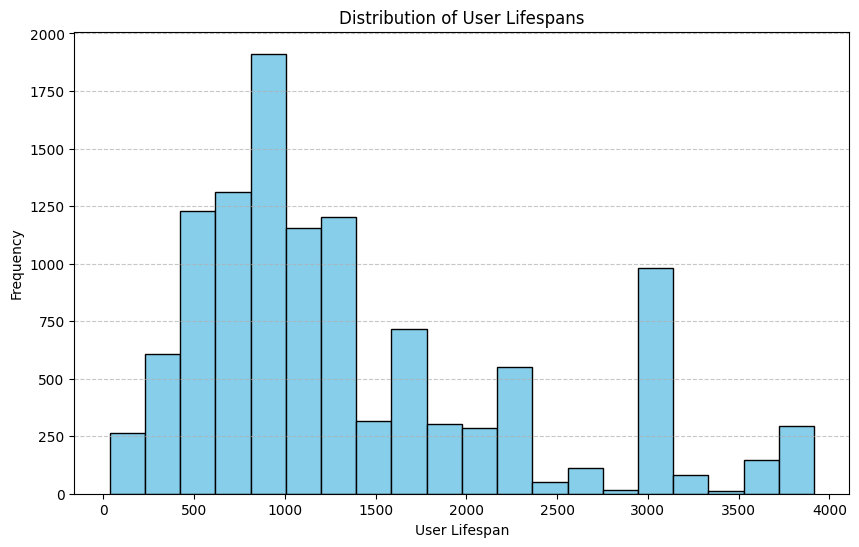

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(user_ls['User_Lifespan'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('User Lifespan')
plt.ylabel('Frequency')
plt.title('Distribution of User Lifespans')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Scatter Plot of User Lifespan vs. Shows Watched:

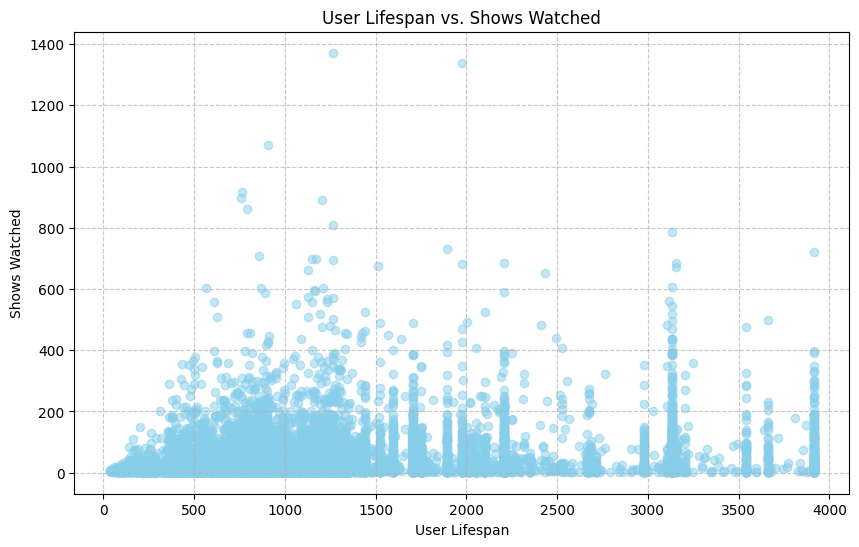

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(user_ls['User_Lifespan'], user_ls['Shows_Watched'], color='skyblue', alpha=0.5)
plt.xlabel('User Lifespan')
plt.ylabel('Shows Watched')
plt.title('User Lifespan vs. Shows Watched')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Particular ID

In [66]:
perticular_id = user_ls[user_ls['ID'] == 5999967]
perticular_id

,ID,Registration_Date,Last_Watched_Date,User_Lifespan,Shows_Watched
3738,5999967,2018-09-21,2023-07-09,1752,66


# 5.1.To show the total time spent by users during their lifespan

In [67]:
user_ls['total_watch_time'] = day_data['total_watch_time']

In [68]:
# Calculate the total watch time in hours
user_ls['Total_watch_time_hours'] = user_ls['total_watch_time'] / 60

In [69]:
user_lifetime_watch_time = user_ls.groupby('ID')['Total_watch_time_hours'].sum().reset_index()
user_lifetime_watch_time['Total_watch_time_timedelta'] = pd.to_timedelta(user_lifetime_watch_time['Total_watch_time_hours'], unit='h')
user_lifetime_watch_time.info

<bound method DataFrame.info of             ID  Total_watch_time_hours Total_watch_time_timedelta
0      5000121                0.768667  0 days 00:46:07.200001200
1      5000329                0.000000            0 days 00:00:00
2      5000426                0.000000            0 days 00:00:00
3      5000432                0.082167  0 days 00:04:55.800001200
4      5000471                0.000000            0 days 00:00:00
...        ...                     ...                        ...
11534  5999245                0.000000            0 days 00:00:00
11535  5999552                0.000000            0 days 00:00:00
11536  5999784                2.124333  0 days 02:07:27.599998800
11537  5999834                0.893833  0 days 00:53:37.799998800
11538  5999967                0.000000            0 days 00:00:00

[11539 rows x 3 columns]>

# Note :
0 days indicates that there are no days in this duration.
20:37:54 represents the time in hours, minutes, and seconds.
599998800 represents microseconds, which is a fraction of a second.
So, the total time duration is approximately 20 hours, 37 minutes, 54 seconds, and 599998 microseconds.

In [70]:
max_index = user_lifetime_watch_time['Total_watch_time_timedelta'].idxmax()
max_user = user_lifetime_watch_time.loc[max_index, ['ID', 'Total_watch_time_timedelta']]
max_user = pd.DataFrame(max_user)
max_user

,5250
ID,5452823
Total_watch_time_timedelta,0 days 20:37:54.599998800


#Particular ID

In [71]:
perticular_id = user_lifetime_watch_time[user_lifetime_watch_time['ID'] == 5999967]
perticular_id

,ID,Total_watch_time_hours,Total_watch_time_timedelta
11538,5999967,0.0,0 days


# 9. User activity for from their registered date to first 15 days, 15 -30 days, 30-60 days, 60-90 days, 90-120 days, 120 to 365 in interval of 30 days

In [72]:
time_intervals = [
    (0, 15),
    (15, 30),
    (30, 60),
    (60, 90),
    (90, 120),
    (120, 365)
]


In [73]:
# Function to categorize users into time intervals
def categorize_users(user_ls):
    days_active = (user_ls['Last_Watched_Date'] - user_ls['Registration_Date']).days
    for start, end in time_intervals:
        if start <= days_active < end:
            return f"{start}-{end} days"
    return "365+ days"

In [74]:
user_ls['Time_Interval'] = user_ls.apply(categorize_users, axis=1)
user_ls = user_ls.sort_values(by='Time_Interval', ascending=False)
user_ls.head(20)

,ID,Registration_Date,Last_Watched_Date,User_Lifespan,Shows_Watched,total_watch_time,Total_watch_time_hours,Time_Interval
9469,5502052,2023-03-12,2023-07-09,119,1,1.98,0.033000,90-120 days
9494,5787083,2023-03-24,2023-07-09,107,5,11.54,0.192333,90-120 days
9487,5958656,2023-03-22,2023-07-09,109,1,1.77,0.029500,90-120 days
9486,5033763,2023-03-22,2023-07-09,109,8,130.65,2.177500,90-120 days
9485,5382456,2023-03-22,2023-07-09,109,10,45.43,0.757167,90-120 days
9492,5891863,2023-03-23,2023-07-09,108,12,97.82,1.630333,90-120 days
9491,5688600,2023-03-23,2023-07-09,108,8,94.37,1.572833,90-120 days
9493,5921398,2023-03-23,2023-07-09,108,12,44.47,0.741167,90-120 days
9496,5848815,2023-03-24,2023-07-09,107,6,0.48,0.008000,90-120 days
9495,5168478,2023-03-24,2023-07-09,107,6,0.50,0.008333,90-120 days


In [75]:
active_users_interval = user_ls.groupby('Time_Interval')['ID'].nunique()
active_users_interval = active_users_interval.sort_values()
active_users_interval = pd.DataFrame(active_users_interval)
active_users_interval

,ID
Time_Interval,
30-60 days,8
60-90 days,25
90-120 days,60
120-365 days,495
365+ days,10951


# 10. what are the content, movies, web series, make them active during those 15 days, 30 days, 60 days, 90 days or overall - top show, what made them revisit after 15 days, or 30 days etc

In [76]:
show_data.head()

,watched_date,show_title,GENRE,episode_title,STREAMING_MINS,device_type,Membership_Status,FIRST_Paid_CHANNEL,Subscription_Level,Giving_Type,...,City,HOUSEHOLD_INCOME,TOUCHPOINTS,PP_Activated,Age,IS_ON_AirStation,IS_ON_WBTA_Station,Acquired_Source,User_Registered_Date_only,ID
0,2021-07-13 13:36:25.243467+00:00,Chicago Tonight,NaN,New Burns and Novick Documentary Explores Life...,0.52,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265
1,2021-07-14 09:40:15.848089+00:00,Hemingway,History,Hemingway and Childhood,1.37,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265
2,2021-07-15 12:10:37.989777+00:00,Greater Boston,NaN,"July 6, 2021",11.33,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265
3,2021-08-18 16:26:05.123773+00:00,Liza with a Z,Arts and Music,Liza With a Z,0.00,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265
4,2021-08-21 20:32:20.856815+00:00,The Congress,NaN,The Congress,71.23,GA Fire TV,Lapsed,Web,low,New,...,Methuen,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01T23:45:39Z,5872265


In [77]:
show_data['Watched_date_only'] = pd.to_datetime(show_data['watched_date'])
show_data['User_Registered_Date_only'] = pd.to_datetime(show_data['User_Registered_Date_only'], errors='coerce')

In [78]:
time_intervals = [15, 30, 60, 90]

In [79]:
results_10 = []

# Loop through each interval and analyze top shows
for interval in time_intervals:
    interval_start = interval
    interval_end = interval * 2
    interval_data = show_data[(show_data['Watched_date_only'] >= show_data['User_Registered_Date_only'] + pd.Timedelta(days=interval_start)) & (show_data['Watched_date_only'] < show_data['User_Registered_Date_only'] + pd.Timedelta(days=interval_end))]

    # Group data by show names and calculate relevant metrics
    show_metrics = interval_data.groupby('show_title').agg(
        Total_Watch_Time=('STREAMING_MINS', 'sum'),
        Total_Users=('ID', 'nunique')
    ).reset_index()

    # Sort by Total_Watch_Time in descending order to get top shows
    top_shows = show_metrics.sort_values(by='Total_Watch_Time', ascending=False)
    top_shows['Interval'] = f'{interval_start}-{interval_end} days'
    results_10.append(top_shows)

# Combine the results
top_shows_df = pd.concat(results_10)

In [80]:
top_shows_and_interval = pd.DataFrame(top_shows_df)
top_shows_and_interval = top_shows_and_interval.sort_values(by='Total_Watch_Time',  ascending=False)
#to 20 show titles with watch_time
top_shows_and_interval = top_shows_and_interval.head(20)
top_shows_and_interval

,show_title,Total_Watch_Time,Total_Users,Interval
121,When Whales Walked: Journeys in Deep Time,114.416667,1,60-120 days
73,Muhammad Ali,110.850000,1,90-180 days
60,Muhammad Ali,110.850000,1,60-120 days
106,The War of 1812,108.483333,1,60-120 days
87,Victoria,104.470000,1,30-60 days
105,Riverdance 25th Anniversary Show,101.700000,1,90-180 days
84,Riverdance 25th Anniversary Show,101.700000,1,60-120 days
144,Tina Turner: One Last Time,90.470000,1,90-180 days
108,Tina Turner: One Last Time,90.470000,1,60-120 days
32,Featured Content,89.350000,1,60-120 days


# Visualization

Scatter Plot for Total Watch Time vs. Total Users:

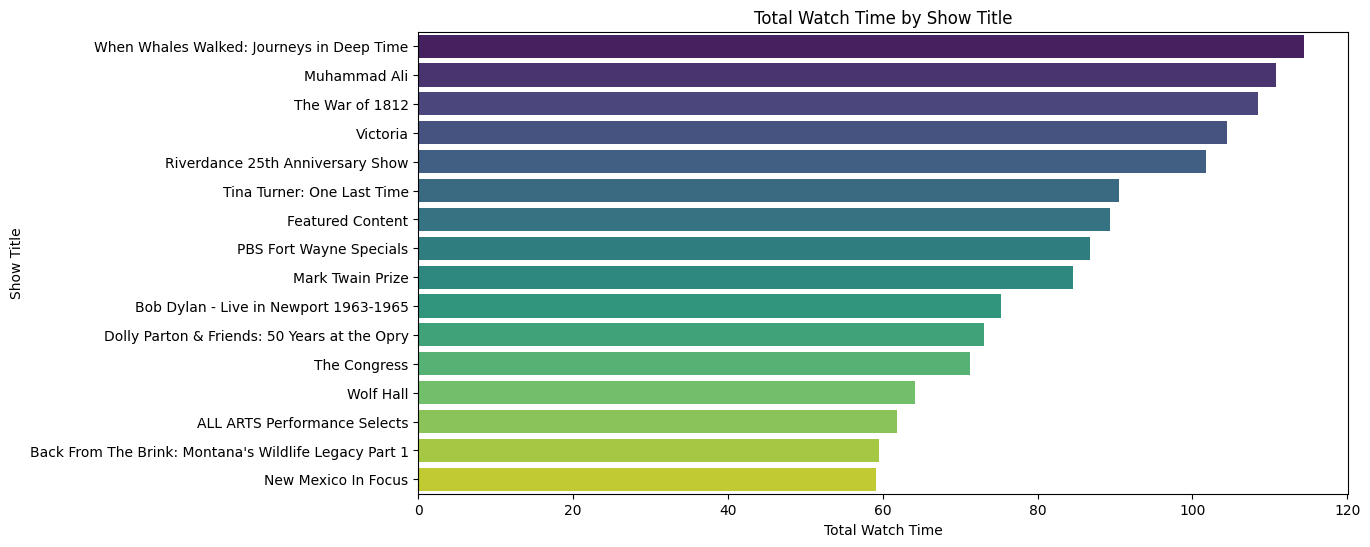

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Watch_Time', y='show_title', data=top_shows_and_interval, palette='viridis')
plt.xlabel('Total Watch Time')
plt.ylabel('Show Title')
plt.title('Total Watch Time by Show Title')
plt.show()

In [82]:
top_shows_and_interval

,show_title,Total_Watch_Time,Total_Users,Interval
121,When Whales Walked: Journeys in Deep Time,114.416667,1,60-120 days
73,Muhammad Ali,110.850000,1,90-180 days
60,Muhammad Ali,110.850000,1,60-120 days
106,The War of 1812,108.483333,1,60-120 days
87,Victoria,104.470000,1,30-60 days
105,Riverdance 25th Anniversary Show,101.700000,1,90-180 days
84,Riverdance 25th Anniversary Show,101.700000,1,60-120 days
144,Tina Turner: One Last Time,90.470000,1,90-180 days
108,Tina Turner: One Last Time,90.470000,1,60-120 days
32,Featured Content,89.350000,1,60-120 days


graph not proper way display

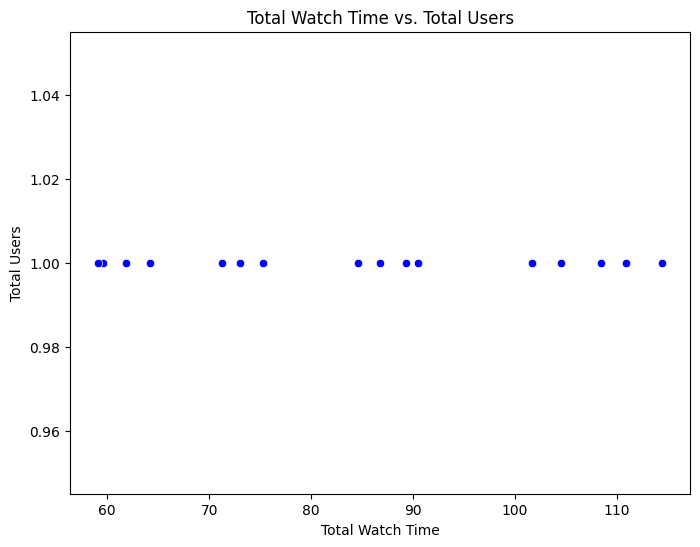

In [83]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Watch_Time', y='Total_Users', data=top_shows_and_interval, color='blue')
plt.xlabel('Total Watch Time')
plt.ylabel('Total Users')
plt.title('Total Watch Time vs. Total Users')
# Customize the y-axis label formatting to display numbers in standard format
formatter = ScalarFormatter()
formatter.set_powerlimits((-3, 4))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Bar Plot for Total Users by Time Interval:

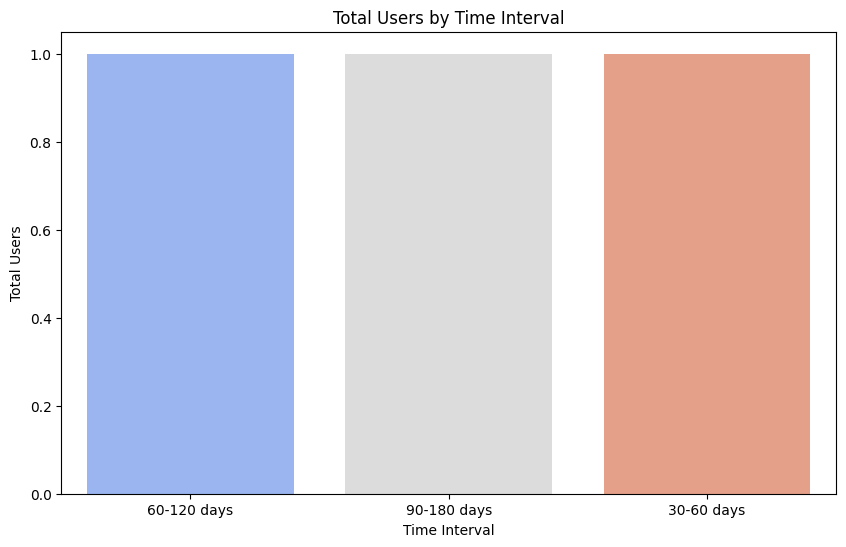

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Interval', y='Total_Users', data=top_shows_and_interval, palette='coolwarm')
plt.xlabel('Time Interval')
plt.ylabel('Total Users')
plt.title('Total Users by Time Interval')
plt.xticks(rotation=360)  # Rotate x-axis labels for better visibility
plt.show()

In [85]:
pivot_top_shows = top_shows_df.pivot_table(index='show_title', columns='Interval', values=['Total_Users', 'Total_Watch_Time'], aggfunc='first')
pivot_top_shows.reset_index(inplace=True)
pivot_top_shows.columns

MultiIndex([(      'show_title',            ''),
            (     'Total_Users',  '15-30 days'),
            (     'Total_Users',  '30-60 days'),
            (     'Total_Users', '60-120 days'),
            (     'Total_Users', '90-180 days'),
            ('Total_Watch_Time',  '15-30 days'),
            ('Total_Watch_Time',  '30-60 days'),
            ('Total_Watch_Time', '60-120 days'),
            ('Total_Watch_Time', '90-180 days')],
           names=[None, 'Interval'])

# 6. Top shows watched - % of users watched that particular shows (Tell us the selling point or why the users registered and churned)

In [86]:
users_per_show = show_data.groupby('show_title')['ID'].nunique()
top_shows = users_per_show.sort_values(ascending=False).head(20)  # You can adjust the number as needed
top_shows

show_title
"The Roosevelts: An Intimate Portrait" Panel Discussion    1
Religion & Ethics NewsWeekly                               1
Red Digital Studios                                        1
Redemption (Standing Tall)                                 1
Redfern Now                                                1
Redlining: Mapping Inequality in Dayton & Springfield      1
Reel 13                                                    1
Reel NW                                                    1
Reflections In The Shadow of Tahoma                        1
Reflections Through Watercolor                             1
Regents Review                                             1
Reilly Ace of Spies                                        1
Relish                                                     1
Recoil                                                     1
Remember (Souviens Toi)                                    1
Remember Me                                                1
Remembering C

In [87]:
users_per_show.head(10)

show_title
"The Roosevelts: An Intimate Portrait" Panel Discussion    1
#MeToo, Now What?                                          1
10 Days in Watts                                           1
10 That Changed America                                    1
100 Days, Dishes, Drinks & Destinations                    1
10thirtysix                                                1
11th and Grant                                             1
13 Commandments                                            1
16 for '16 - The Contenders                                1
180 Days                                                   1
Name: ID, dtype: int64

In [88]:
total_users = len(show_data['ID'].unique())
top_shows_percentage = (top_shows / total_users) * 100

In [89]:
top_20_shows_df = pd.DataFrame({
    'Top Show': top_shows.index,
    'Percentage of Users': top_shows_percentage.values,
    'Number of Users Watched': top_shows.values
})
top_20_shows_df

,Top Show,Percentage of Users,Number of Users Watched
0,"""The Roosevelts: An Intimate Portrait"" Panel D...",0.059809,1
1,Religion & Ethics NewsWeekly,0.059809,1
2,Red Digital Studios,0.059809,1
3,Redemption (Standing Tall),0.059809,1
4,Redfern Now,0.059809,1
5,Redlining: Mapping Inequality in Dayton & Spri...,0.059809,1
6,Reel 13,0.059809,1
7,Reel NW,0.059809,1
8,Reflections In The Shadow of Tahoma,0.059809,1
9,Reflections Through Watercolor,0.059809,1


# Particular ID

In [90]:
perticular_id_6 = top_20_shows_df[top_20_shows_df['Top Show'] == 'Regents Review']
perticular_id_6

,Top Show,Percentage of Users,Number of Users Watched
10,Regents Review,0.059809,1


# 11. age group wise top shows

In [91]:
age_group_top_shows = show_data.groupby(['Age', 'show_title'])['ID'].count().reset_index()
age_group_top_shows = age_group_top_shows .sort_values(by='Age', ascending=False)
age_group_top_shows

,Age,show_title,ID
2384,Over 75,unMASKing Hope,1
2080,Over 75,Inheritance,1
2068,Over 75,I Remember Television,1
2069,Over 75,IN Close,1
2070,Over 75,INXS: Live Baby Live,1
...,...,...,...
2,18 to 25,Here's the Story,1
1,18 to 25,Counting from Infinity: Yitang Zhang and the T...,1
4,18 to 25,Level One Trauma,1
5,18 to 25,The Laura Flanders Show,1


In [92]:
age_group_top_shows = age_group_top_shows.rename(columns={'ID': 'Total_Users_Watched'})
age_group_top_shows = age_group_top_shows.sort_values(by=['Age', 'Total_Users_Watched'], ascending=[True, False])
age_group_top_shows = age_group_top_shows.groupby('Age').head(10).reset_index(drop=True)
age_group_top_shows

,Age,show_title,Total_Users_Watched
0,18 to 25,Jazz at Lincoln Center Presents: A Swingin’ Se...,1
1,18 to 25,Here's the Story,1
2,18 to 25,Counting from Infinity: Yitang Zhang and the T...,1
3,18 to 25,Level One Trauma,1
4,18 to 25,The Laura Flanders Show,1
...,...,...,...
61,Over 75,Iconic Women of Country,1
62,Over 75,Idaho Public Television Specials,1
63,Over 75,In Our Community,1
64,Over 75,In Tune: A Community of Musicians,1


# 11.1 To group genres by age groups and calculate the statistics

In [93]:
age_group_top_genre = show_data.groupby(['Age', 'GENRE'])['ID'].count().reset_index()
age_group_top_genre = age_group_top_genre.sort_values(by=['ID'], ascending=[False])
age_group_top_genre

,Age,GENRE,ID
21,50 to 64,Drama,57
23,50 to 64,History,42
27,50 to 64,Science and Nature,39
37,70 to 74,Arts and Music,38
20,50 to 64,Culture,38
19,50 to 64,Arts and Music,35
14,40 to 49,History,33
48,Over 75,Drama,32
46,Over 75,Arts and Music,28
30,65 to 69,Drama,28


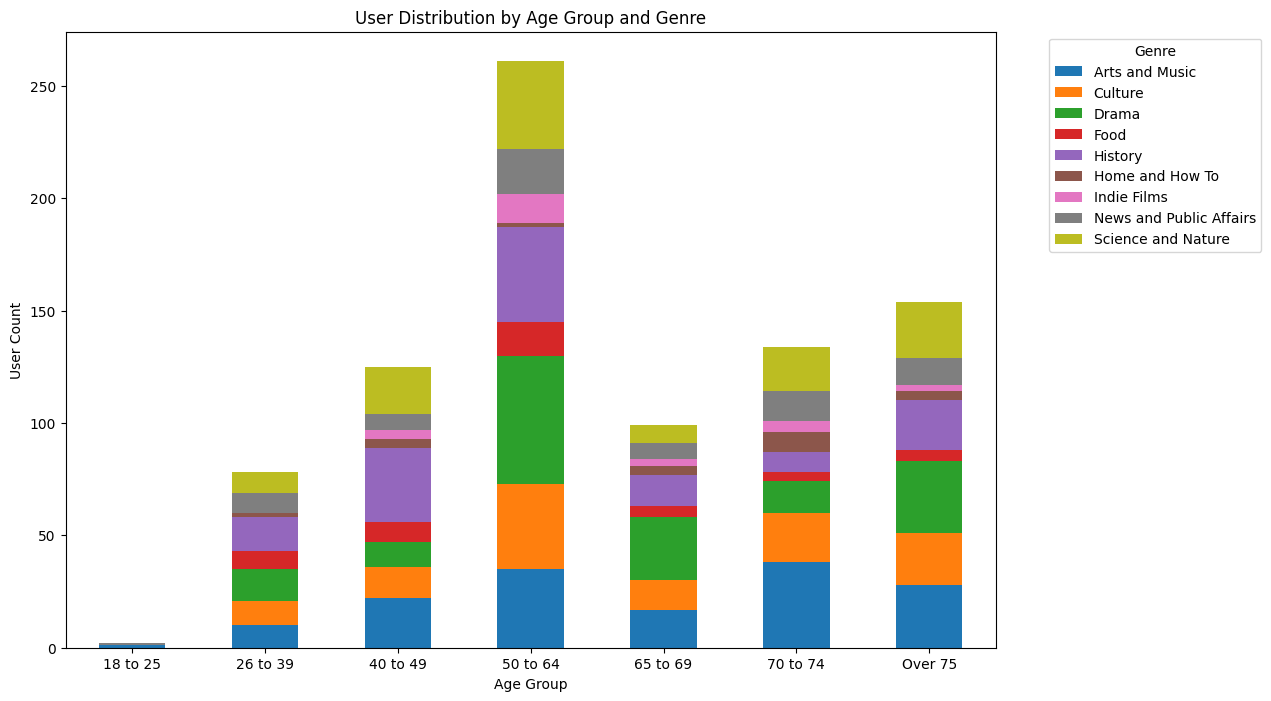

In [94]:
age_group_top_genre_df = pd.DataFrame(age_group_top_genre, columns=["Age", "GENRE", "ID"])

# Pivot the data for visualization
pivot_df = age_group_top_genre_df.pivot(index="Age", columns="GENRE", values="ID")

# Plot a bar chart
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("User Distribution by Age Group and Genre")
plt.xlabel("Age Group")
plt.ylabel("User Count")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=360)
plt.show()

result = show_data.groupby(['Age', 'GENRE']).agg(
    User_Count=pd.NamedAgg(column='ID', aggfunc='count'),
).reset_index()

print(result)

to show the number of users for each age group and genre

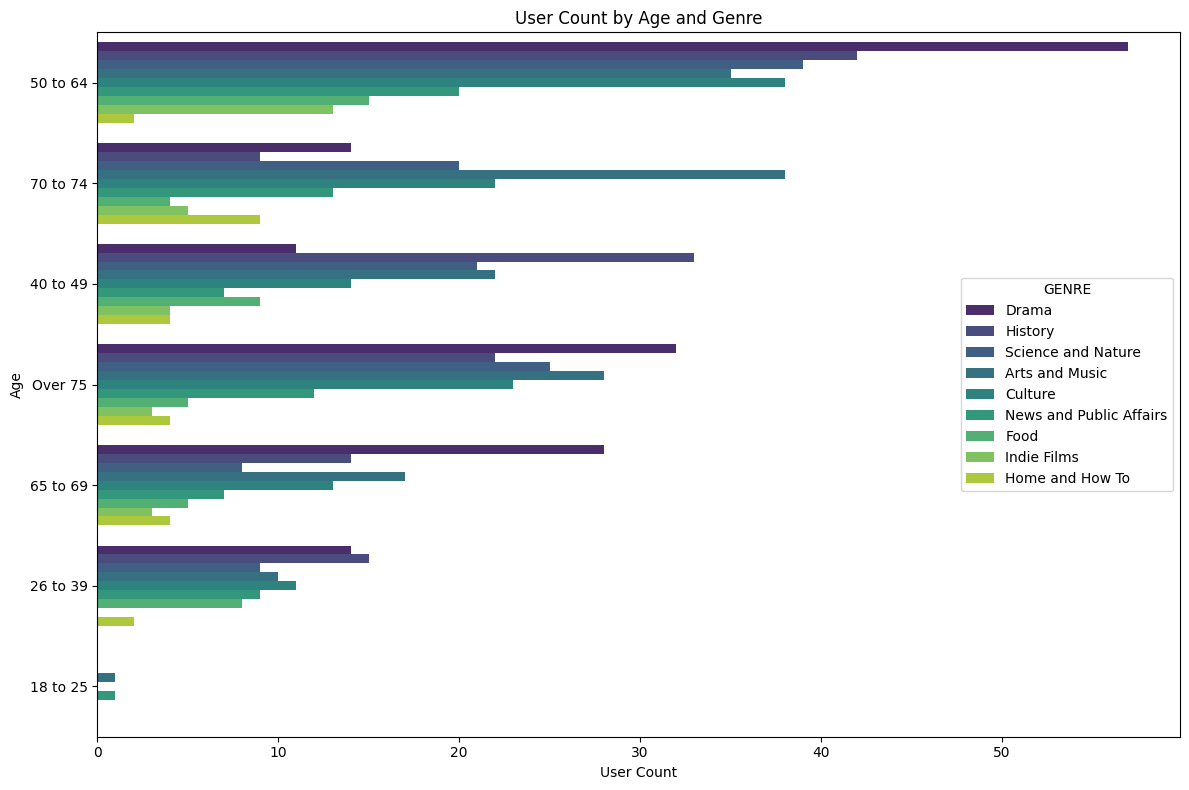

In [95]:
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='ID', y='Age', hue='GENRE', data=age_group_top_genre_df, palette='viridis')
plt.xlabel('User Count')
plt.ylabel('Age')
plt.title('User Count by Age and Genre')
plt.tight_layout()
plt.show()

# 11.3.House_hold income wise top show

In [96]:
show_data

,watched_date,show_title,GENRE,episode_title,STREAMING_MINS,device_type,Membership_Status,FIRST_Paid_CHANNEL,Subscription_Level,Giving_Type,...,HOUSEHOLD_INCOME,TOUCHPOINTS,PP_Activated,Age,IS_ON_AirStation,IS_ON_WBTA_Station,Acquired_Source,User_Registered_Date_only,ID,Watched_date_only
0,2021-07-13 13:36:25.243467+00:00,Chicago Tonight,NaN,New Burns and Novick Documentary Explores Life...,0.520000,GA Fire TV,Lapsed,Web,low,New,...,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01 23:45:39+00:00,5872265,2021-07-13 13:36:25.243467+00:00
1,2021-07-14 09:40:15.848089+00:00,Hemingway,History,Hemingway and Childhood,1.370000,GA Fire TV,Lapsed,Web,low,New,...,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01 23:45:39+00:00,5872265,2021-07-14 09:40:15.848089+00:00
2,2021-07-15 12:10:37.989777+00:00,Greater Boston,NaN,"July 6, 2021",11.330000,GA Fire TV,Lapsed,Web,low,New,...,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01 23:45:39+00:00,5872265,2021-07-15 12:10:37.989777+00:00
3,2021-08-18 16:26:05.123773+00:00,Liza with a Z,Arts and Music,Liza With a Z,0.000000,GA Fire TV,Lapsed,Web,low,New,...,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01 23:45:39+00:00,5872265,2021-08-18 16:26:05.123773+00:00
4,2021-08-21 20:32:20.856815+00:00,The Congress,NaN,The Congress,71.230000,GA Fire TV,Lapsed,Web,low,New,...,131000.0,6,N,40 to 49,Yes,No,9Org,2021-06-01 23:45:39+00:00,5872265,2021-08-21 20:32:20.856815+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681955,2023-05-18 03:19:18.909000+00:00,An Ozark Mountain Symphony: A Musical Celebration,Arts and Music,An Ozark Mountain Symphony: A Musical Celebration,2.000000,Roku,Lapsed,On-Air,above_avg,Renewal,...,104000.0,4,N,Over 75,No,Yes,9Org,2021-07-19 18:47:17+00:00,5007964,2023-05-18 03:19:18.909000+00:00
1693833,2023-02-10 21:18:19.904000+00:00,Stories I Didn't Know,Culture,Stories I Didn't Know,2.316667,Roku,Lapsed,Web,low,New,...,NaN,4,Y,NaN,No,Yes,9Org,2023-01-09 20:02:41+00:00,5706170,2023-02-10 21:18:19.904000+00:00
1695710,2023-01-25 18:33:16.953000+00:00,For Your Home,Home and How To,Outdoor Living,0.383333,Roku,Lapsed,Web,low,Rejoin,...,134000.0,5,N,26 to 39,No,Yes,9Org,2021-09-28 18:15:23+00:00,5184090,2023-01-25 18:33:16.953000+00:00
1702357,2023-06-19 04:59:41.991000+00:00,Sweet Dillard,Arts and Music,Sweet Dillard,51.383333,TVOS,Lapsed,Web,low,New,...,NaN,4,Y,NaN,No,Yes,9Org,2022-02-23 02:51:41+00:00,5805198,2023-06-19 04:59:41.991000+00:00


To visualize the relationship between "HOUSEHOLD_INCOME" and "total_watch_time,"

In [97]:
Household_income_top_shows = day_data.groupby(['HOUSEHOLD_INCOME'])['total_watch_time'].sum().reset_index()
Household_income_top_shows.sort_values(by='total_watch_time', ascending=False)
Household_income_top_shows.head(10)

,HOUSEHOLD_INCOME,total_watch_time
0,1000.0,30829.946667
1,2000.0,24896.490000
2,3000.0,5843.266667
3,4000.0,5059.873333
4,5000.0,6.000000
5,6000.0,15775.000000
6,7000.0,72.840000
7,8000.0,689214.550619
8,9000.0,1001.783333
9,10000.0,400.800000


# 12.year wise top shows - (5 or 10), year-month wise top shows (5 or 10)

<Figure size 2500x1600 with 0 Axes>

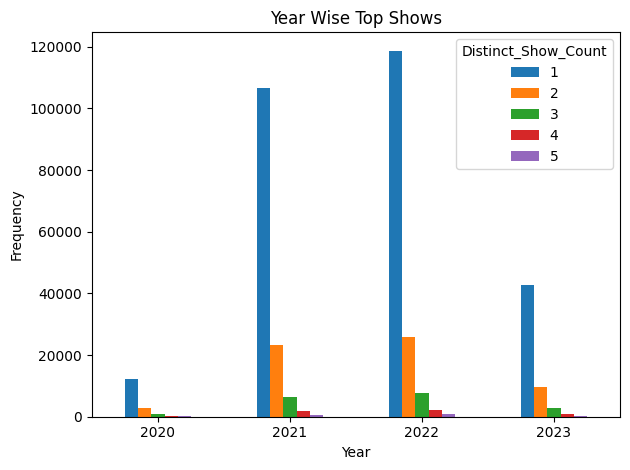

<Figure size 3500x1600 with 0 Axes>

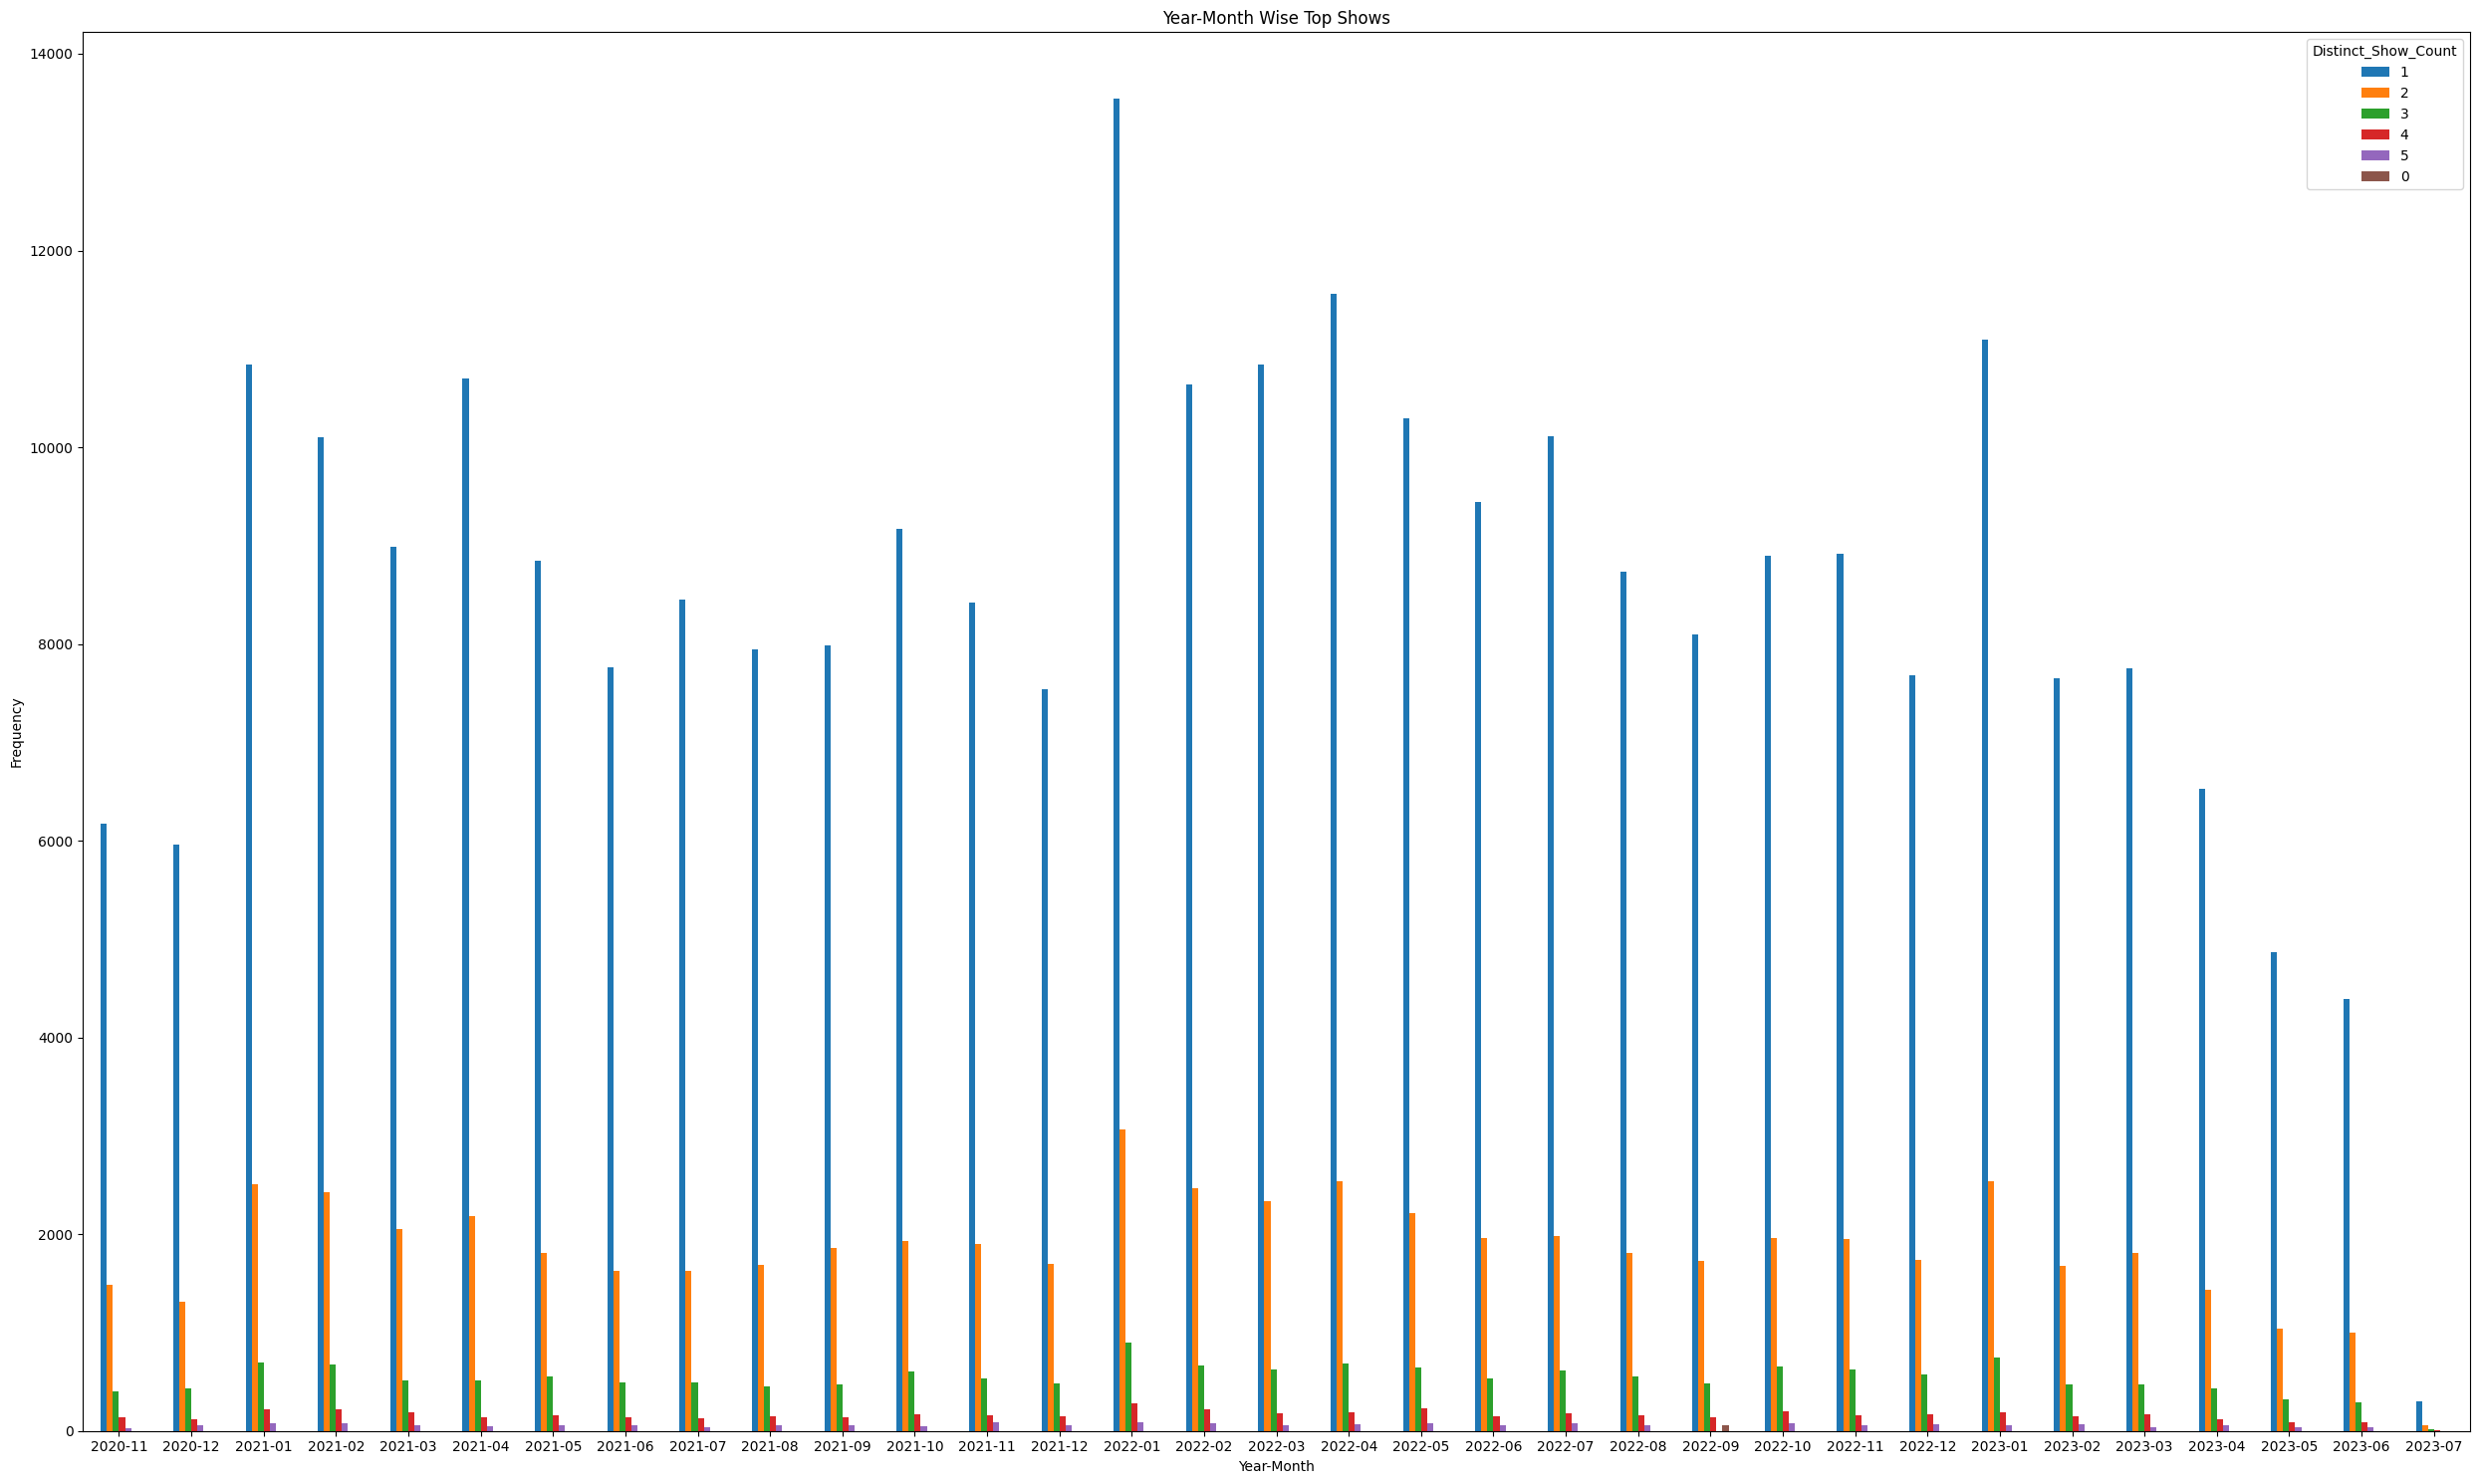

In [98]:
day_data['Year'] = day_data['Watched_date_only'].dt.year
day_data['YearMonth'] = day_data['Watched_date_only'].dt.to_period('M')

top_shows_by_year = day_data.groupby('Year')['Distinct_Show_Count'].value_counts().groupby(level=0).head(5)
top_shows_by_year_month = day_data.groupby('YearMonth')['Distinct_Show_Count'].value_counts().groupby(level=0).head(5)

plt.figure(figsize=(25,16))
top_shows_by_year.unstack().plot(kind='bar')
plt.title('Year Wise Top Shows')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

plt.figure(figsize=(35, 16))
top_shows_by_year_month.unstack().plot(kind='bar', figsize=(25, 15))
plt.title('Year-Month Wise Top Shows')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

<Figure size 3000x2200 with 0 Axes>

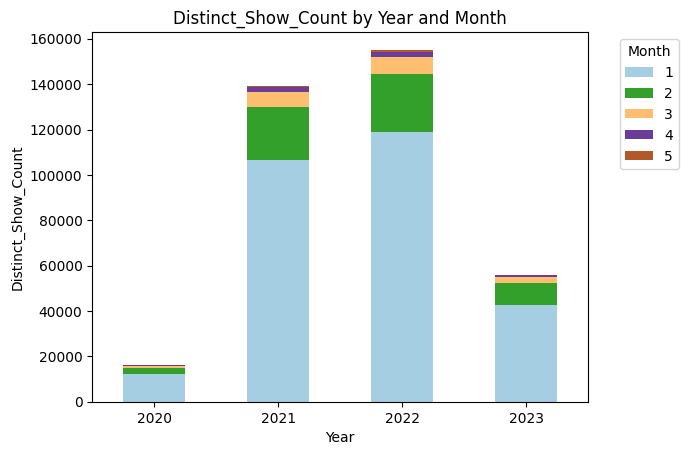

In [99]:
plt.figure(figsize=(30, 22))
top_shows_by_year.unstack().plot(kind='bar', stacked=True, colormap='Paired')

plt.xlabel('Year')
plt.ylabel('Distinct_Show_Count')
plt.title('Distinct_Show_Count by Year and Month')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# 12.1.Year-wise Top Shows (e.g., Top 10 for each year)

In [100]:
import pandas as pd
day_data=pd.read_csv("/content/drive/MyDrive/day_wise_data_ss.csv")
month_data=pd.read_csv("/content/drive/MyDrive/month_wise_data_ss.csv")
show_data=pd.read_csv("/content/drive/MyDrive/show_lvl_data_ss.csv")

In [101]:
user_activity_data = pd.merge(day_data[['total_watch_time']], month_data[['Year', 'Month']], left_index=True, right_index=True)
user_activity_data = pd.merge(user_activity_data, show_data[['show_title']], left_index=True, right_index=True)

In [102]:
year_month_top_shows = user_activity_data.groupby(['Year', 'Month', 'show_title'])['total_watch_time'].sum().reset_index()

In [103]:
import pandas as pd
new_df = pd.concat([day_data[['total_watch_time', 'ID']], month_data[['Year', 'Month']], show_data[['show_title']]], axis=1)

In [104]:
yearly_top_shows = new_df.groupby(['Year', 'show_title'])['total_watch_time'].sum().reset_index()
yearly_top_shows

,Year,show_title,total_watch_time
0,2020.0,10 That Changed America,307.090000
1,2020.0,2021 duPont-Columbia Awards,150.516667
2,2020.0,8 MMM,216.650000
3,2020.0,A Capitol Fourth,193.440000
4,2020.0,A Chef's Life,1903.650000
...,...,...,...
4144,2023.0,You Are Cordially Invited,55.080000
4145,2023.0,You Oughta Know,54.530000
4146,2023.0,You're Doing It Wrong,110.200000
4147,2023.0,Your DNA Secrets Revealed,52.750000


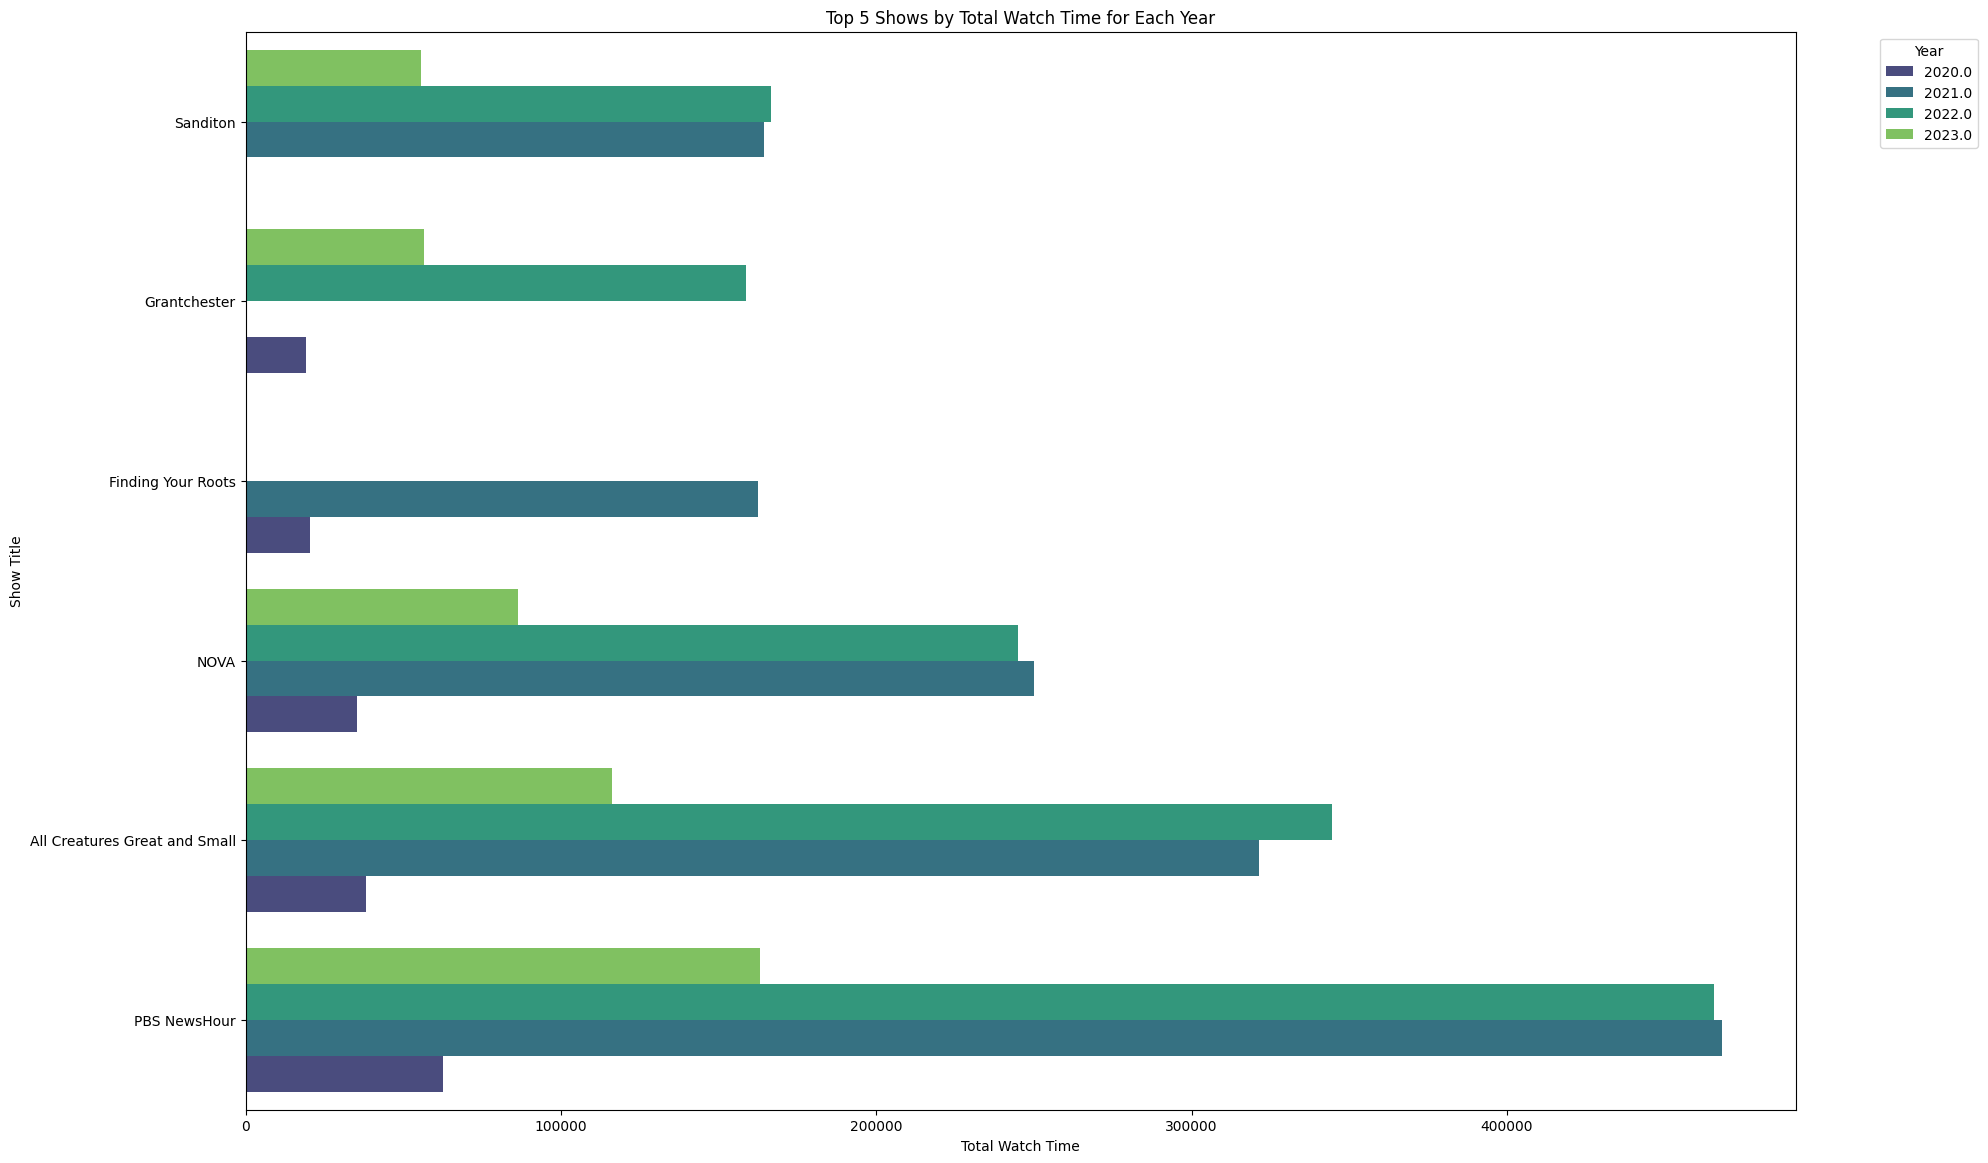

In [105]:
sorted_data = yearly_top_shows.sort_values(by=['Year', 'total_watch_time'], ascending=[True, False])

data_2020 = top_shows_by_year[top_shows_by_year.index.get_level_values('Year') == 2020]
# Filter the top shows for each year (e.g., top 5 shows)
top_shows_by_year = sorted_data.groupby('Year').head(5)

# Create a bar plot
plt.figure(figsize=(20, 14))
sns.barplot(x='total_watch_time', y='show_title', hue='Year', data=top_shows_by_year, palette='viridis')

# Customize labels and title
plt.xlabel('Total Watch Time')
plt.ylabel('Show Title')
plt.title('Top 5 Shows by Total Watch Time for Each Year')

# Show the legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Invert y-axis to show the highest watch time at the top
plt.gca().invert_yaxis()

plt.show()

# Year 2020 Top 10 Shows

In [106]:
year_20_top_shows = top_shows_by_year[top_shows_by_year['Year'] == 2020]
year_20_top_shows

,Year,show_title,total_watch_time
377,2020.0,PBS NewsHour,62707.680000
22,2020.0,All Creatures Great and Small,38094.915067
341,2020.0,NOVA,35226.124714
175,2020.0,Finding Your Roots,20470.591700
191,2020.0,Grantchester,19330.532393


# Year 2021 Top 10 Shows

In [107]:
year_21_top_shows = top_shows_by_year[top_shows_by_year['Year'] == 2021]
year_21_top_shows

,Year,show_title,total_watch_time
1407,2021.0,PBS NewsHour,468120.502308
671,2021.0,All Creatures Great and Small,321280.330890
1324,2021.0,NOVA,249903.246118
1526,2021.0,Sanditon,164267.786241
990,2021.0,Finding Your Roots,162578.843800


#Year 2022 Top 10 Shows

In [108]:
year_23_top_shows = top_shows_by_year[top_shows_by_year['Year'] == 2022]
year_23_top_shows

,Year,show_title,total_watch_time
2708,2022.0,PBS NewsHour,465751.577546
1969,2022.0,All Creatures Great and Small,344649.432688
2620,2022.0,NOVA,244884.635525
2823,2022.0,Sanditon,166485.253386
2331,2022.0,Grantchester,158618.505950


# Year 2023 Top 10 Shows

In [109]:
year_23_top_shows = top_shows_by_year[top_shows_by_year['Year'] == 2023]
year_23_top_shows

,Year,show_title,total_watch_time
3784,2023.0,PBS NewsHour,163098.848761
3257,2023.0,All Creatures Great and Small,116182.496410
3725,2023.0,NOVA,86257.592003
3517,2023.0,Grantchester,56654.446667
3876,2023.0,Sanditon,55662.844186


# 12.2.Year-Month-wise Top Shows (e.g., Top 10 for each year and month):

```
# Here new_df contains show_title, Year, month, total_watch_time
```



In [110]:
year_month_top_shows = new_df.groupby(['Year', 'Month', 'show_title'])['total_watch_time'].sum().reset_index()

In [111]:
year_month_top_shows.sort_values(by=['Year', 'Month', 'total_watch_time'], ascending=[True, True, False], inplace=True)

In [112]:
top_shows_by_year_month = year_month_top_shows.groupby(['Year', 'Month']).head(10)
top_shows_by_year_month

,Year,Month,show_title,total_watch_time
286,2020.0,11.0,PBS NewsHour,32653.180000
258,2020.0,11.0,NOVA,20307.076667
15,2020.0,11.0,All Creatures Great and Small,18421.553165
261,2020.0,11.0,Nature,10069.888710
130,2020.0,11.0,Finding Your Roots,10040.710000
...,...,...,...,...
17396,2023.0,7.0,Sanditon,1243.076418
17385,2023.0,7.0,Professor T,1194.570000
17327,2023.0,7.0,Grantchester,1138.640000
17293,2023.0,7.0,Call the Midwife,1018.973333


# 7. During which time of the day - user activity or no of users active count (distribution)

# 8. YoY or Year-Monthly trend in activity, watch duration spent etc

In [113]:
month_data.head()

,Year,Month,total_watch_time,Distinct_GENRE_Count,Distinct_Show_Count,Distinct_episodes_Count,No_of_times_episodes_watched,FIRST_Paid_CHANNEL,Subscription_Level,Giving_Type,HOUSEHOLD_INCOME,TOUCHPOINTS,PP_Activated,Age,IS_ON_AirStation,IS_ON_WBTA_Station,Acquired_Source,ID
0,2020,12,82.39,2,2,2,2,Web,low,New,111000.0,4,N,26 to 39,Yes,No,NaN,5304602
1,2021,2,307.81,3,3,10,10,Web,low,New,111000.0,4,N,26 to 39,Yes,No,NaN,5304602
2,2021,3,176.90,3,4,6,6,Web,low,New,111000.0,4,N,26 to 39,Yes,No,NaN,5304602
3,2021,5,145.90,2,6,7,8,Web,low,New,111000.0,4,N,26 to 39,Yes,No,NaN,5304602
4,2021,6,169.83,1,1,5,5,Web,low,New,111000.0,4,N,26 to 39,Yes,No,NaN,5304602


In [114]:
month_data['Age'] = pd.to_numeric(month_data['Age'], errors='coerce')

In [115]:
monthly_activity = month_data.groupby(['Year', 'Month']).agg(
    Total_Users=('ID', 'nunique'),
    Total_Watch_Duration=('total_watch_time', 'sum'),
    Distinct_Genre_Count=('Distinct_GENRE_Count', 'mean'),
    Distinct_Show_Count=('Distinct_Show_Count', 'mean'),
    Distinct_Episodes_Count=('Distinct_episodes_Count', 'mean'),
    Subscription_Level_Trend=('Subscription_Level', lambda x: x.value_counts().idxmax()),
    Household_Income_Mean=('HOUSEHOLD_INCOME', 'mean'),
    Acquired_Source_Trend=('Acquired_Source', lambda x: x.value_counts().idxmax() if not x.empty else None),
    Touchpoints_Mean=('TOUCHPOINTS', 'mean')
).reset_index()


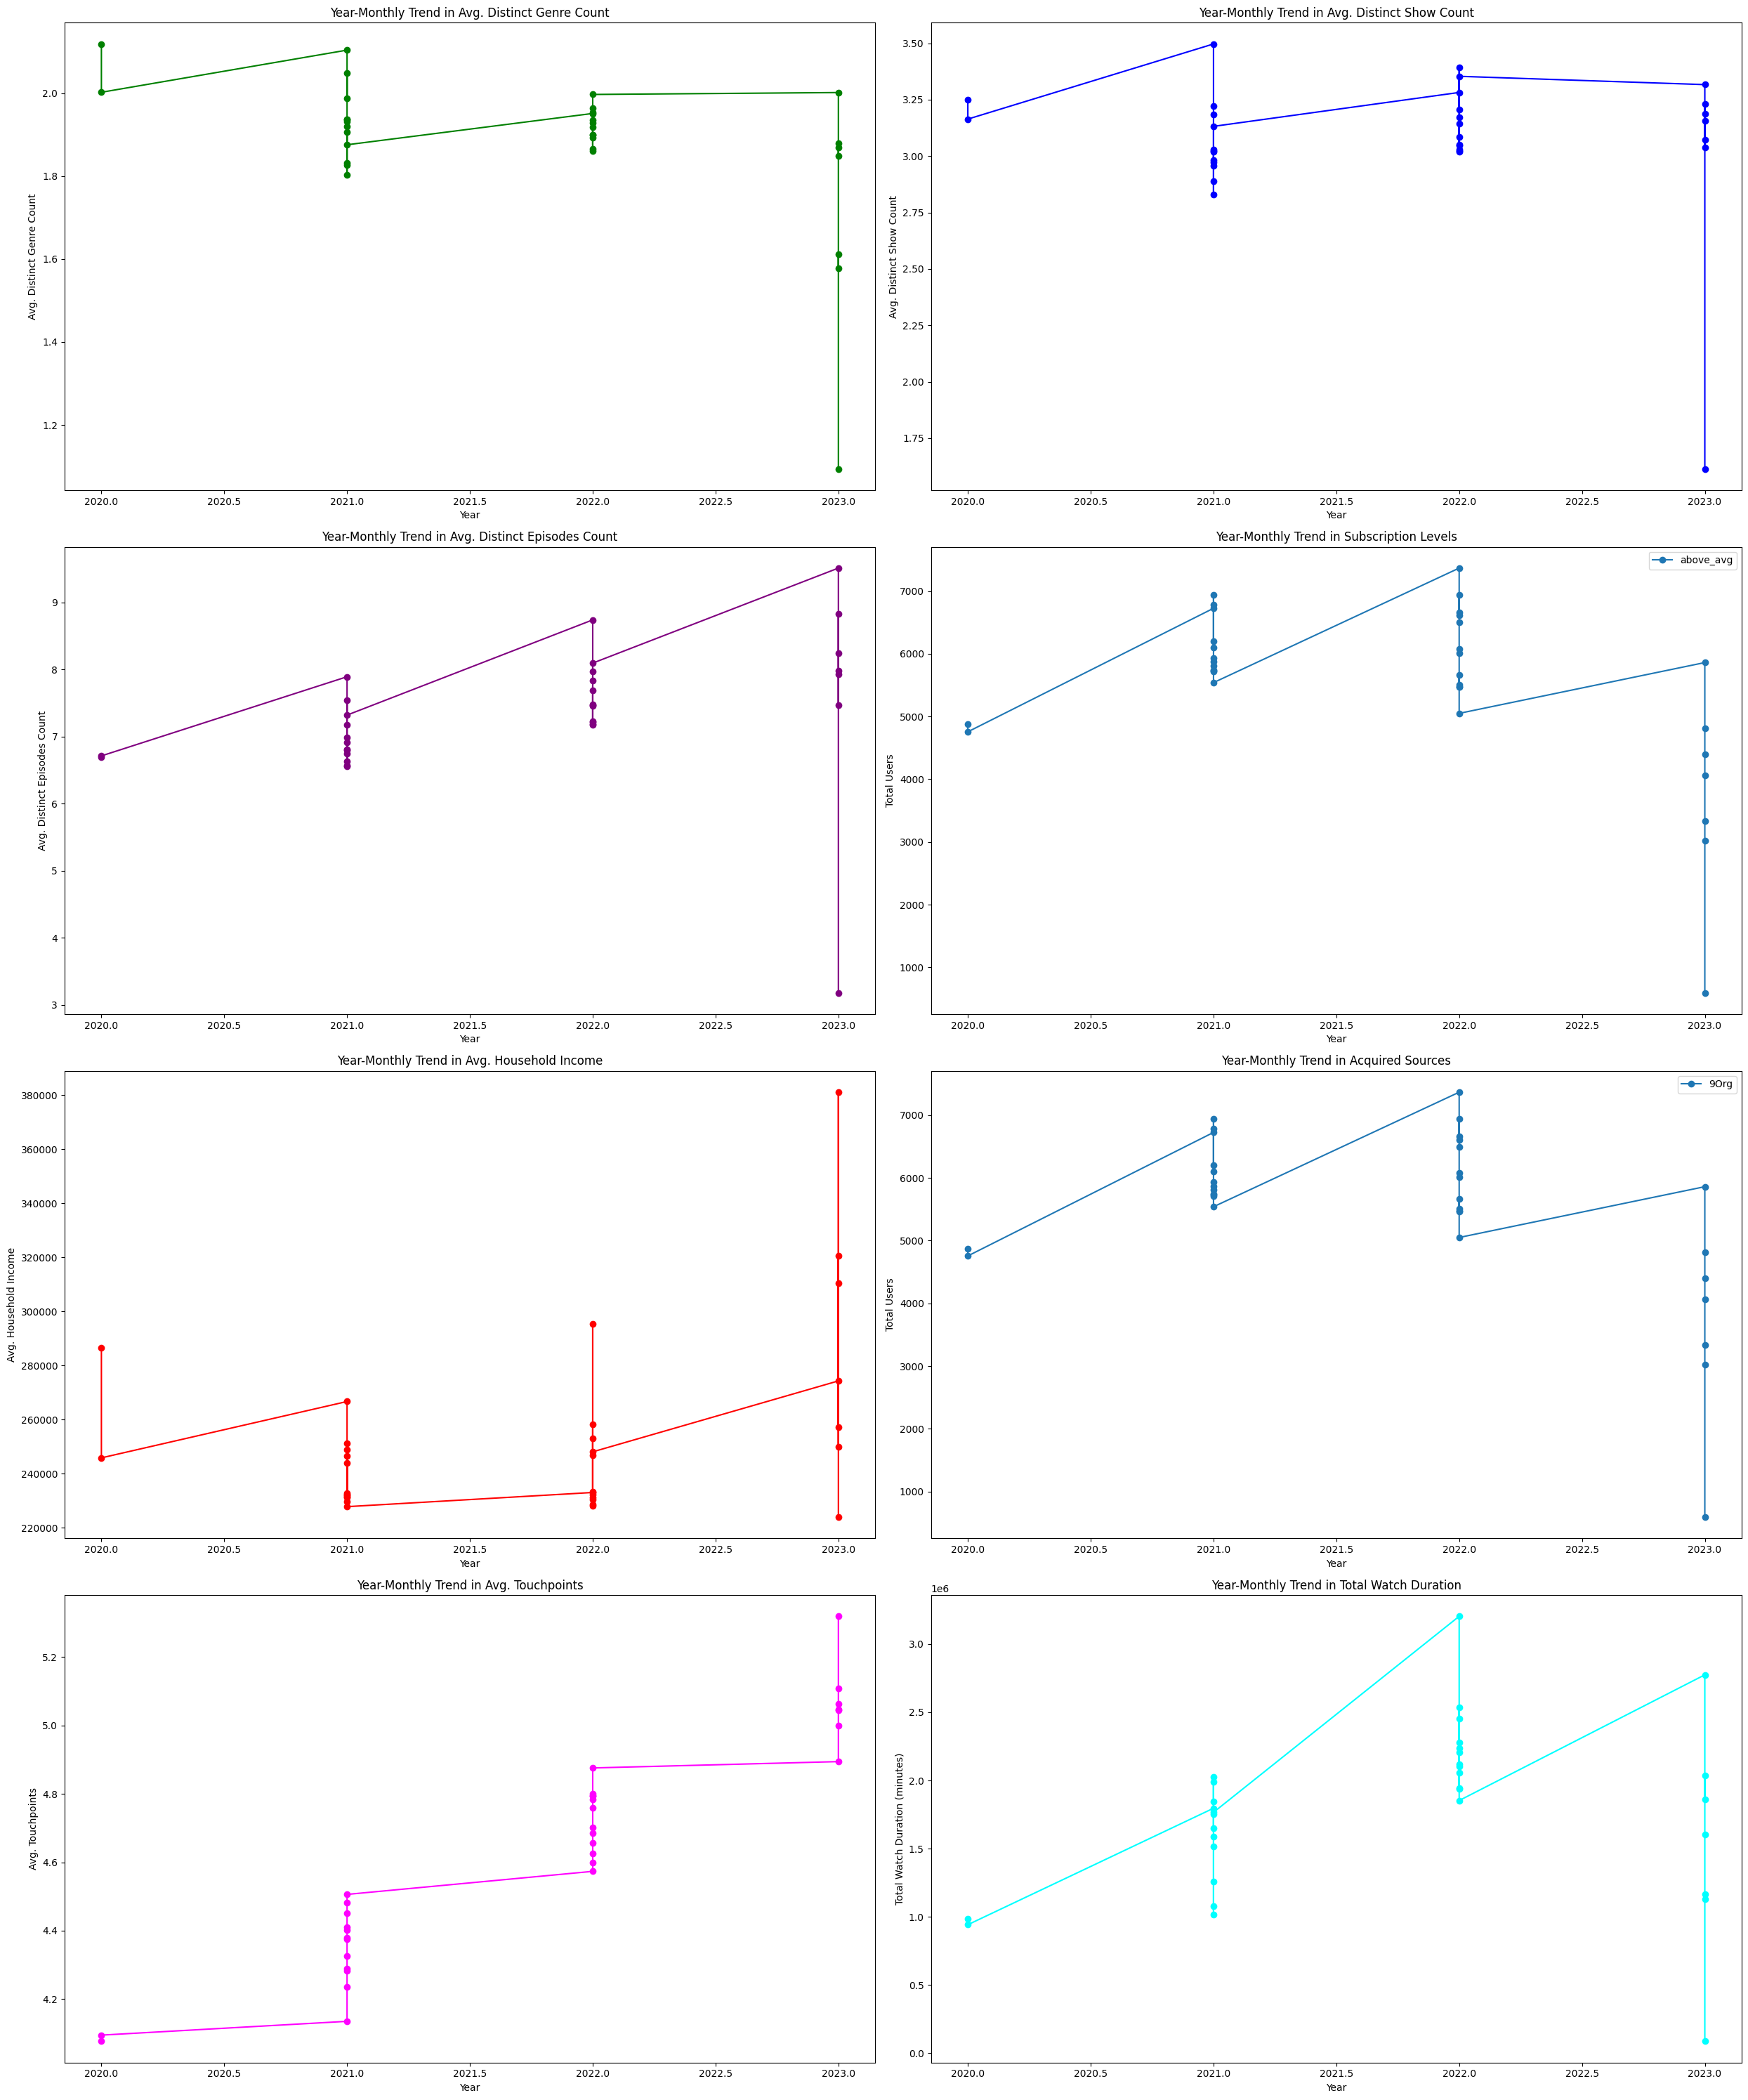

In [116]:
plt.figure(figsize=(25, 30))
plt.subplot(4, 2, 1)
plt.plot(monthly_activity['Year'], monthly_activity['Distinct_Genre_Count'], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Avg. Distinct Genre Count')
plt.title('Year-Monthly Trend in Avg. Distinct Genre Count')

plt.subplot(4, 2, 2)
plt.plot(monthly_activity['Year'], monthly_activity['Distinct_Show_Count'], marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Avg. Distinct Show Count')
plt.title('Year-Monthly Trend in Avg. Distinct Show Count')

plt.subplot(4, 2, 3)
plt.plot(monthly_activity['Year'], monthly_activity['Distinct_Episodes_Count'], marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Avg. Distinct Episodes Count')
plt.title('Year-Monthly Trend in Avg. Distinct Episodes Count')

plt.subplot(4, 2, 4)
subscription_levels = monthly_activity['Subscription_Level_Trend'].unique()
for level in subscription_levels:
    level_data = monthly_activity[monthly_activity['Subscription_Level_Trend'] == level]
    plt.plot(level_data['Year'], level_data['Total_Users'], marker='o', label=level)
plt.xlabel('Year')
plt.ylabel('Total Users')
plt.title('Year-Monthly Trend in Subscription Levels')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(monthly_activity['Year'], monthly_activity['Household_Income_Mean'], marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Avg. Household Income')
plt.title('Year-Monthly Trend in Avg. Household Income')

plt.subplot(4, 2, 6)
acquired_sources = monthly_activity['Acquired_Source_Trend'].dropna().unique()
for source in acquired_sources:
    source_data = monthly_activity[monthly_activity['Acquired_Source_Trend'] == source]
    plt.plot(source_data['Year'], source_data['Total_Users'], marker='o', label=source)
plt.xlabel('Year')
plt.ylabel('Total Users')
plt.title('Year-Monthly Trend in Acquired Sources')
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(monthly_activity['Year'], monthly_activity['Touchpoints_Mean'], marker='o', color='magenta')
plt.xlabel('Year')
plt.ylabel('Avg. Touchpoints')
plt.title('Year-Monthly Trend in Avg. Touchpoints')

plt.subplot(4, 2, 8)
plt.plot(monthly_activity['Year'], monthly_activity['Total_Watch_Duration'], marker='o', color='cyan')
plt.xlabel('Year')
plt.ylabel('Total Watch Duration (minutes)')
plt.title('Year-Monthly Trend in Total Watch Duration')

plt.tight_layout()
plt.show()

# 6. Top shows watched - % of users watched that particular shows (Tell us the selling point or why the users registered and churned)

In [117]:
show_watched_counts = new_df.groupby('show_title')['ID'].nunique().reset_index()

In [118]:
show_watched_counts = show_watched_counts.sort_values(by='ID', ascending=False)

In [119]:
total_users = new_df['ID'].nunique()

In [120]:
# Calculate the percentage of users who watched each show
show_watched_counts['Percentage_Of_Users'] = (show_watched_counts['ID'] / total_users) * 100

In [121]:
print(show_watched_counts.head(10))

                         show_title    ID  Percentage_Of_Users
1994                   PBS NewsHour  6873            28.855116
1785                           NOVA  6781            28.468869
144   All Creatures Great and Small  6424            26.970066
1809                         Nature  5162            21.671775
927              Finding Your Roots  4568            19.177967
226               Antiques Roadshow  4271            17.931063
1699        Miss Scarlet & The Duke  4170            17.507032
183                American Masters  3951            16.587598
885                       FRONTLINE  3923            16.470045
1084             Great Performances  3733            15.672362


In [122]:
genre_show_watched_counts = show_data.groupby(['GENRE', 'show_title'])['ID'].nunique().reset_index()
genre_show_watched_counts

,GENRE,show_title,ID
0,Arts and Music,A Capitol Fourth,430
1,Arts and Music,A Classic Christmas with the Bach Festival Soc...,19
2,Arts and Music,A Night of Georgia Music,2
3,Arts and Music,A Raisin in the Sun Revisited: The Raisin Cycl...,2
4,Arts and Music,A Southern Celtic Christmas,14
...,...,...,...
1268,Science and Nature,Wild Scandinavia,39
1269,Science and Nature,Wild Weather,181
1270,Science and Nature,Wonders of Mexico,89
1271,Science and Nature,Your DNA Secrets Revealed,14


In [123]:
genre_total_users = show_data.groupby('GENRE')['ID'].nunique().reset_index()
genre_total_users

,GENRE,ID
0,Arts and Music,10198
1,Culture,9436
2,Drama,18400
3,Food,5146
4,History,13908
5,Home and How To,6047
6,Indie Films,5590
7,News and Public Affairs,9773
8,Science and Nature,11750


In [124]:
# Merge the two DataFrames to associate each show with its genre
genre_show_watched_counts = genre_show_watched_counts.merge(genre_total_users, on='GENRE', suffixes=('', '_total'))
genre_show_watched_counts

,GENRE,show_title,ID,ID_total
0,Arts and Music,A Capitol Fourth,430,10198
1,Arts and Music,A Classic Christmas with the Bach Festival Soc...,19,10198
2,Arts and Music,A Night of Georgia Music,2,10198
3,Arts and Music,A Raisin in the Sun Revisited: The Raisin Cycl...,2,10198
4,Arts and Music,A Southern Celtic Christmas,14,10198
...,...,...,...,...
1268,Science and Nature,Wild Scandinavia,39,11750
1269,Science and Nature,Wild Weather,181,11750
1270,Science and Nature,Wonders of Mexico,89,11750
1271,Science and Nature,Your DNA Secrets Revealed,14,11750


In [125]:
genre_total_users = genre_total_users.rename(columns={'ID': 'ID_total'})
genre_total_users

,GENRE,ID_total
0,Arts and Music,10198
1,Culture,9436
2,Drama,18400
3,Food,5146
4,History,13908
5,Home and How To,6047
6,Indie Films,5590
7,News and Public Affairs,9773
8,Science and Nature,11750
